# Análisis de recaudación y eficiencia recaudatoria
Análisis mensual
- Comparativo con Ley de Ingresos.
- Comparativo con año anterior.
- Análisis de compensaciones y devoluciones.
- Análisis de eficiencia.

Análisis trimestral
- Si se tienen datos de fin de trimestre:

## Instrucciones
Análisis de recaudación tributaria.
- Se analiza comportamiento de ingresos tributarios, en valores brutos y netos. También se observa el comportamiento de devoluciones y compensaciones, buscando estudiar el impacto que tuvo la suspensión de compensaciones en 2019.
- Se estudia la eficiencia recaudatoria, definida como la recaudación bruta en términos del Producto Interno bruto (PIB).
    - Un aspecto a tomar en cuenta es la diferencia en termporalidad que hay entre el PIB, que se calcula trimestralmente, y la recaudación, que es mensual. Para lograr un análisis mensual usando los datos más recientes de recaudación, necesitamos asignar un valor al PIB del trimestre relativo a los datos tributarios. 
    - Estudiamos el comportamiento de la eficiencia recaudatoria en el tiempo. Dada la alta estacionalidad, comparamos la de cada mes en los últimos 5 años.
    - Analizamos la eslasticidad de recaudación con respecto al PIB.
    - Repetimos el análisis de eficiencia a nivel trimestral.

### Instrucciones:
- Jupyter notebook tiene dos estados: Edit y command. 
   - El modo editar se usa para modificar el contenido de una celda, y se puede ver cuando el color a la izquierda de la celda es verde. Para acceder al modo editar, hay que pulsar enter en la celda deseada. 
   - El modo command sirve para correr el código, para copiar y pegar celdas enteras, para cambiar el modo de una celda, etc. Si esta en modo editar, hay que pulsar esc para llegar al modo command.
- Las celdas pueden ser código o markdown (texto), (ver cell -> cell type). Esta celda es markdown. Para cambiar el modo de una celda a markdown, se puede pulsar M en modo command.
- Principales comandos:
    - shift + enter: Correr celda
    - A: Insertar celda arriba (en modo command)
    - B: Insertar celda abajo (en modo command)
    - ESC: Salir de modo edit
    - Enter: Entrar a modo edit
- Cada que vean download.<>() o describe.<>(), se está llamando una función que fue definida en download.py o en describe.py. Para ver instrucciones de la función, pueden ver el script o escribir help() con el nombre de la función  (ejemplo: help(download.get_files))
- Las funciones tienen argumentos. Los argumentos pueden ser introducidos en orden, o en desorden llamando el nombre del argumentp. Por ejemplo, una función que sume dos valores y los divida entre un tercero: sum_x_y_div(1, 2, 3) es igual a sum_x_y(x=1, y=2, z=3)
- En Python todos los límites inferiores se incluyen y los superiores se excluyen.
- Python ofrece integers(1, 2, ...,) floats(1.3..., 2.0, ), Booleans: (True, False) listas: [1, 2, 3], diccionarios: {'a': 1, 'b':2, 'c':3}, sets: {1, 2, 3, ...}, tuples: (1, 2, 3) (Aquí no usamos sets).
    - Listas:
        - Para obtener numero de elementos en lista: len(list)
        - Para obtener el primer elemento de una lista: list[0]
        - '' '' '' '' '' último '' '' '' '' '' '' '' ': list[-1] o list[len(list) -1]
        - '''''''''''''''Del primero al tercero '''''': list[0:3] (El primero se incluye, el último de excluye)
    - Diccionarios:
        - Los diccionarios son un mapa de 'key' a 'value': dict1 = {'a' : 1, 'b': 2, 'c': 3, 'd': [1, 2, 3]}
        - Para obtener el valor asociado a la letra 'a': dict1['a']
        - Para modificar el valor asociado a la letra 'b' : dict1['b'] = 8
        - Para aggregar la letra 'z' con el valor 5: dict1['z'] = 5
    - Tuples:
        - Son como listas, pero no se pueden modificar.
        - Para obtener los elementos, se usa el mismo sintax que con listas.
- Además, las librerias Numpy y Pandas sirven para trabajar con listas de números y con matrices de forma eficiente. Numpy ofrece los numpy arrays, que son vectors con los que se pueden hacer operaciones de vectores. Pandas ofrece DataFrames, que son matrices formadas por vectores llamados pandas Series. Esta es la principal estrictura para trabajar con datos.
    - Los DataFrames tienen columnas e indices. Las columnas son los nombres de las variables, el índice es un identificador de cada fila. Los indices pueden ser numéricos, strings, o para Time Series, elementos de fecha (DateTime)
        - Para obtener la columna 'a' de un DataFrame: DF['a']
        - Para obtener la fila asociada con el índice 2: DF.loc[2]
        - Para obtener el elemento de la fila 2, columna 'a': DF.loc[2, 'a']
        - Para obtener el cuarto elemento (sin importar el valor de su índice): DF.iloc[3]
- Cada que haya dudas, revisar el tipo del objeto usando type(object)

# Parámetros a modificar

In [1]:
params = {
    # Colocar año de análisis. Servirá para establecer todas las fechas de inicio del año:
    'anio': 2019,
    # Indicamos si vamos a actualizar los datos de recaudación o no
    'actualizacion_recaudacion': False,
    # Colocamos ruta al archivo que se va a usar para actualizar datos fiscales. (Carpeta preliminar ...)
    # Indicar None si los datos se van a actualizar de forma manual o si no se van a actualizar.
        'archivo_datos_fiscales_brutos_actualizar': '../inputs/cuadros_preliminares/Cuadros carpeta preliminar junio 19.xlsx',
    # Mes que se va a actualizar: (Colocar mes en número). Indicar None si no se van a actualizar datos.
    'mes_a_actualizar': 6,
    # Colocar estimación más reciente de crecimiento de BANXICO
    'estimacion_crecimiento_banxico': 1.4,
    # Colocar estimación más reciente de crecimiento de SHCP
    'estimación_crecimiento_SHCP': 1.6,
    # Indicar qué estimación se desea usar para el crecimiento del PIB. Hay 4 opciones:
    # opciones pib_prediction: 'igae', 'pib_last_year', 'banxico', 'shcp', epecifica(int o float)]
    # igae: Usar crecimiento del último mes del IGAE. Tiene sentido cuando se cuenta con un mes de IGAE del trimestre
    #     a predecir.
    # pib_last_year: Usar mismo crecimiento del trimestre relevante del año anterior
    # shcp: Usar crecimiento anual estimado por SHCP
    # banxico: Usar crecimiento anual estimado por Banxico
    # especifica: Indicar crecimiento anual a usar
    'pib_prediction': 0.8,
    # Indicar si se quiere ajustar por estacionalidad. Para transformar los crecimientos de SHCP, BANXICO, y el
    # crecimiento específico, hay que hacer un despeje tomando como dado los crecimientos ya observados. Estos
    # crecimientos se pueden estacionalizar usando el método Holt Winters. Si se especifica True, el 
    # se ajusta por estacionalidad. Para ello, se estima el crecimiento usando Holt Winters de los trimestres
    # restantes, y después se transforma para que el promedio de el crecimiento del año indicado.
    'adjust_seasonality': True
}

#### Comandos para poder modificar scripts de Python y ver los cambios inmediatamente en notebook:

In [2]:
# Configuraciones de Jupyter que sirven para que cambios en los scripts se actualicen automáticamente
%load_ext autoreload
%autoreload 2

#### Importar paquetes y scripts de Python:

In [3]:
#Paquetes de Python:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns


# Scripts propios:
import download
import descriptive

#Opciones de visualización
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Actualizamos datos de recaudación
- Para actualizar los datos has dos caminos:
    - se puede indicar la ubicación del cuadro preliminar, y si este es consitente con el de abril, mayo y junio, Python podrá obtener los valores de forma auotomática.
    - Se pueden indicar los valores de forma manual en el cuadro después del siguiente
- Después, usamos esos datos para actualizar el csv que tenemos. Importamos el csv, eliminamos el valor del mes a actualizar si es que existe, pegamos los nuevos datos y guardamos el csv.

### Leemos últimos datos de recaudación. (Cuadro preliminar)

In [4]:
# Solo corremos este código si se indicó que se van a actualizar datos
# Leemos los ultimos datos y revisamos si son correctos. 
if params['actualizacion_recaudacion']:
    # Leemos excel de ingresos brutos, pues lo vamos a actualizar.
    excel_fiscales_brutos = pd.read_excel('../inputs/ingresos_tributarios_desglosados.xlsx')
    # Leemos cuadro preliminar.
    new_vals = download.extract_from_cuadro_preliminar(params['archivo_datos_fiscales_brutos_actualizar'])
    # Revisamos que datos sean correctos
    display(new_vals)

In [5]:
# Solo corremos este código si se indicó que se van a actualizar datos
if params['actualizacion_recaudacion']:
    # Si no se indicó una ruta en params, tenemos que ingresar los valores manualmente. Indicar valores en pesos
    if not params['archivo_datos_fiscales_brutos_actualizar']:
        dict_to_update_filtered:{
             'ing_gob_fed_bruto': np.nan,
             'ing_gob_fed_neto': np.nan,
             'ing_trib_bruto': np.nan,
             'ing_trib_neto': np.nan,
             'isr_bruto': np.nan,
             'isr_neto': np.nan,
             'isr_dev': np.nan,
             'isr_comp': np.nan,
             'isr_reg': np.nan,
             'iva_bruto': np.nan,
             'iva_neto': np.nan,
             'iva_dev': np.nan,
             'iva_comp': np.nan,
             'ieps_bruto': np.nan,
             'ieps_neto': np.nan,
             'ieps_dev': np.nan,
             'ieps_comp': np.nan,
             'ieps_reg': np.nan,
             'ing_no_trib_bruto': np.nan,
             'ing_no_trib_neto': np.nan,
             'mes': np.nan,
             'anio': np.nan,
             'mes_n': np.nan}

In [6]:
if params['actualizacion_recaudacion']:
    # Creamos un diccionar que mapea numero con mes. Servirá para poblar la columna mes_n
    diccionario_meses = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 
        8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
    # Creamos un diccionar que usaremos para modificar los nombres del cuadro preliminar,
    # por nombres de nuestro excel.
    rename_dict = {'ingresos_gobierno_federal': 'ing_gob_fed',
                   'ingresos_tributarios': 'ing_trib',
                   'ingresos_no_tributarios': 'ing_no_trib',
                   'netos': 'neto',
                   'brutos': 'bruto',
                   'regu': 'reg'}
    # Creamos un diccionario vacio
    dict_to_update = {}
    # Multiplicamos los valores por 1 millón para tenelos en pesos porque el excel esta en pesos
    # (Despues la función que lee el excel los vuelve a convertir a millones)
    new_vals = new_vals * 1000000
    # Haremos un loop para cada fula de los new_vals. Para hacer eso, haces iterrows()
    for tax, row in new_vals.iterrows():
        # MOdificamos el nombre, usando el diccionario y la funcion dict.get()
        row.index = [rename_dict.get(tax, tax) + '_' + rename_dict.get(x, x)for x in row.index]
        # Actualizamos el dict_to_update, usando a el mismo y a los valores de la fila.
        dict_to_update = {**dict_to_update, **row.to_dict()}
    # Nos quedamos unicamente con las claves que estan en el excel
    dict_to_update_filtered = {k:v for k,v in dict_to_update.items() if k in excel_fiscales_brutos.columns}
    # Añadimos mes, anio y mes_n
    dict_to_update_filtered['mes'] = params['mes_a_actualizar']
    dict_to_update_filtered['anio'] = params['anio']
    dict_to_update_filtered['mes_n'] = diccionario_meses[params['mes_a_actualizar']]
    # Eliminamoslos valores que estan en ese anio y mes
    index_to_drop = (excel_fiscales_brutos.loc[
            (excel_fiscales_brutos['anio'] == params['anio'])\
          & (excel_fiscales_brutos['mes'] == params['mes_a_actualizar'])]).index
    # Eliminamos los valores asociados a ese índice
    excel_fiscales_brutos.drop(index_to_drop, inplace=True)
    excel_fiscales_brutos = excel_fiscales_brutos.append(dict_to_update_filtered, ignore_index=True)
    excel_fiscales_brutos.to_excel('../inputs/ingresos_tributarios_desglosados_updated.xlsx', index=False)

## Importando datos

Cada una de las siguientes funciones sirve para cargar los datos descargados como Pandas DataFrame. Las funciones fueron escritas para que Python sepa donde están los datos descargados, por eso no hay que indicar la ruta de los csv. Si se especifica sa=True, en las funciones de IGAE y de PIB_r, se cargan los datos ajustados por estacionalidad. El principal requisito para correr estas funciones es haber descargado los datos. 

Otra opción sería importar cada uno de los CSV usando df = pd.read_csv(csv_path). De hecho, cada una de estas funciones hace eso, pero también hacen unas modificaciones que nos ayudan mucho, por ejemplo:
- Convierten los datos a datos mensuales con índice DateTime
- Crean variables en valores reales, usando en INPC
- Crean variables conjuntas (Como la suma de devoluciones y compensacines para ingresos sat).
- Etc

In [4]:
# Importamos csv con ingresos brutos
ingresos_totales = download.load_ingresos_fiscales(
    excel_brutos='../inputs/ingresos_tributarios_desglosados_updated.xlsx')
# Importamos csv con ingresos netos
# ingresos_brutos = download.load_ingresos_fiscales_netos()
# Importamos csv con ingresos netos
# ingresos_netos = download.load_ingresos_fiscales_netos()
# Importamos IGAE
igae = download.load_inegi_indic('igae')
# Importamos PIB real
pib_r_df = download.load_pib_r(monthly=True)
# Importamos el calendario de la Ley de Ingresos de la Federación
calendario_lif = download.load_calendario_lif()

In [16]:
ingresos_totales[['iva_comp_(mdp)', 'isr_comp_(mdp)', 'ieps_comp_(mdp)',
                 'iva_comp_(mdp)_r', 'isr_comp_(mdp)_r', 'ieps_comp_(mdp)_r',
                 'iva_dev_(mdp)', 'isr_dev_(mdp)', 'ieps_dev_(mdp)',
                 'iva_dev_(mdp)_r', 'isr_dev_(mdp)_r', 'ieps_dev_(mdp)_r',
                 'inpc_x']].to_excel('../compensaciones_y_devoluciones.xlsx')

# Comparación con LIF

In [8]:
# creamos lista de variables que vamos a comparar
observados_a_comparar = ['ing_gob_fed_neto_(mdp)',\
                         'ing_no_trib_neto_(mdp)_r',\
                         'ing_trib_neto_(mdp)_r',\
                         'isr_neto_(mdp)_r',\
                         'iva_neto_(mdp)_r',\
                         'ieps_neto_(mdp)_r']
presupuestados_a_comparar = ['ingresos_gobierno_federal_presupuestado_r',\
                             'ingresos_no_tributatios_presupuestado_r',\
                             'ingresos_tributarios_presupuestado_r',\
                             'isr_presupuestado_r',\
                             'iva_presupuestado_r',\
                             'ieps_presupuestado_r']

In [9]:
# Hacemos un DF conjunto para que sea mas facil graficar y obtener estadísticas comparativas
df_comparacion = pd.merge(
    calendario_lif[presupuestados_a_comparar],
    ingresos_totales[observados_a_comparar],
    left_index=True, right_index=True,
    how='left')
# df_comparacion = df_comparacion.loc['{}-01-01'.format(params['anio']):]

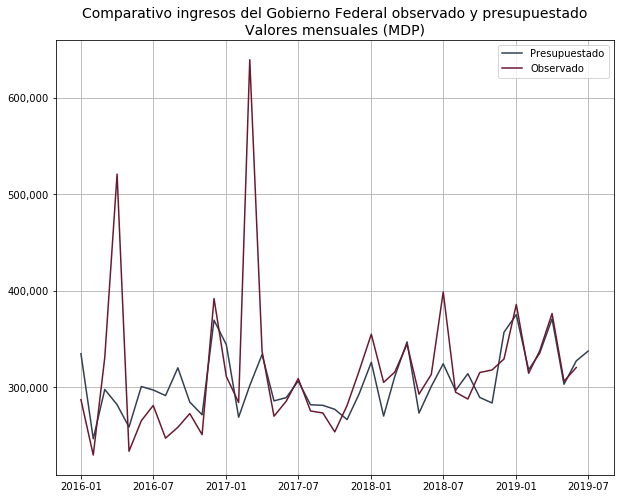

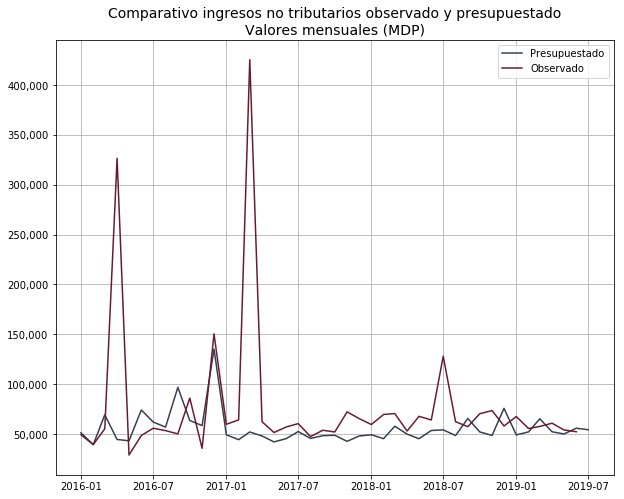

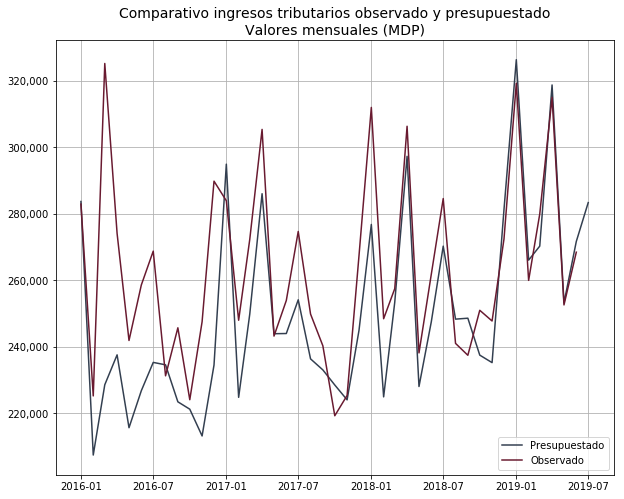

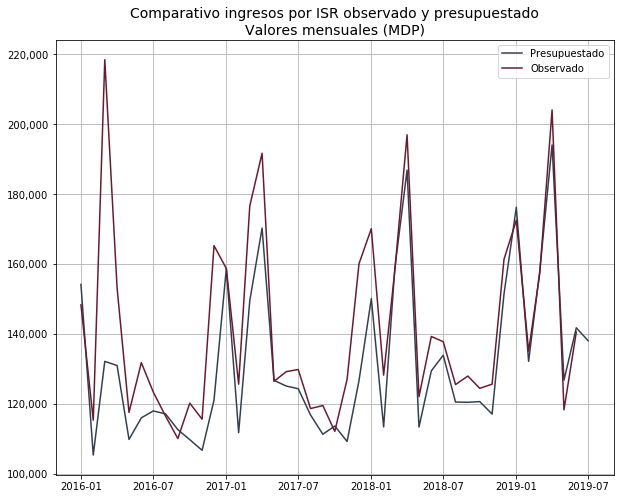

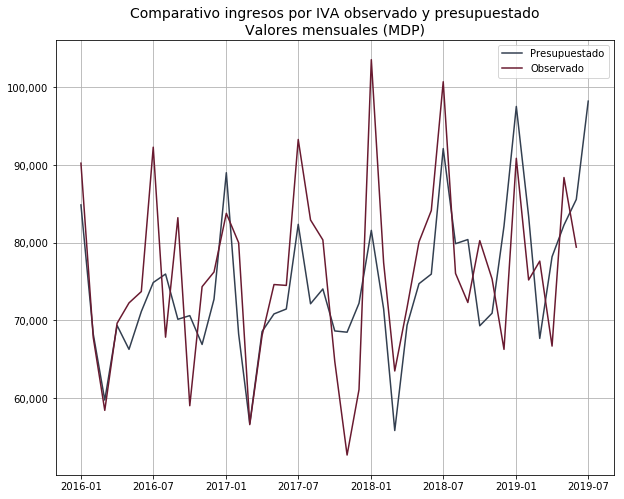

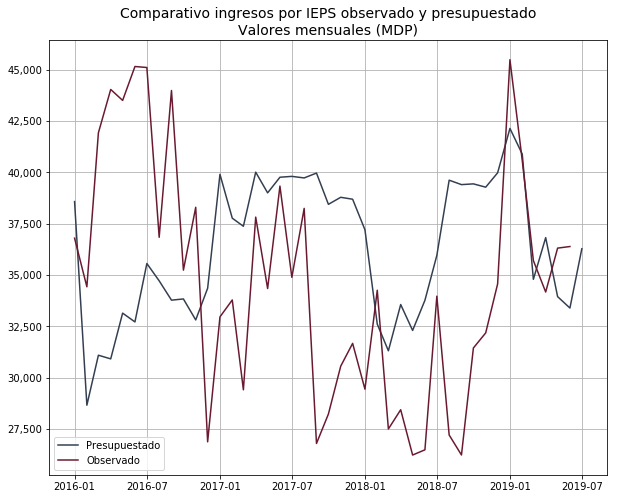

In [11]:
# Vamos a graficar varias sub graficas. Para ello vamos a usar las listas de columnas.
# Creamos una lista de los titulos que usaremos
titulos = ['ingresos del Gobierno Federal',
           'ingresos no tributarios',
           'ingresos tributarios',
           'ingresos por ISR',
           'ingresos por IVA',\
           'ingresos por IEPS']
number_of_graphs = len(titulos)
for i in range(number_of_graphs):
    cols_to_plot = [presupuestados_a_comparar[i], observados_a_comparar[i]]
    titulo = 'Comparativo {} observado y presupuestado'.format(titulos[i])
    descriptive.plot_series(df=df_comparacion, cols=cols_to_plot, title=titulo,
                            subtitle='Valores mensuales (MDP)', legend=['Presupuestado', 'Observado'],
                            figsize=(10, 8))

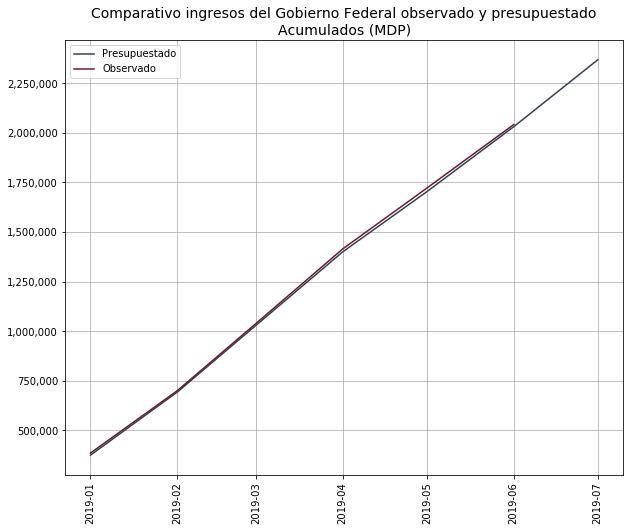

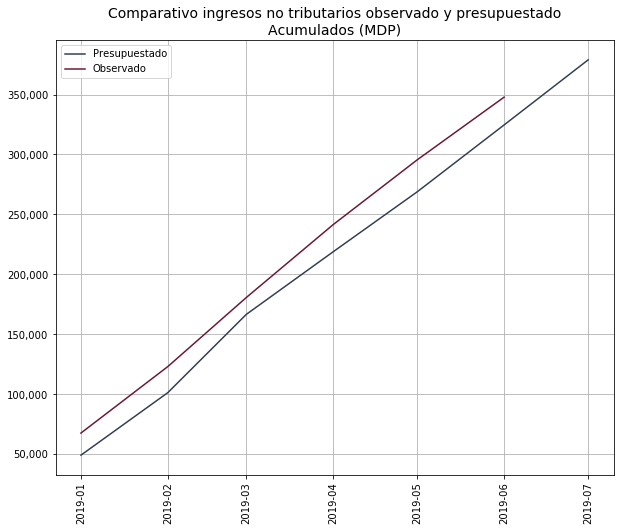

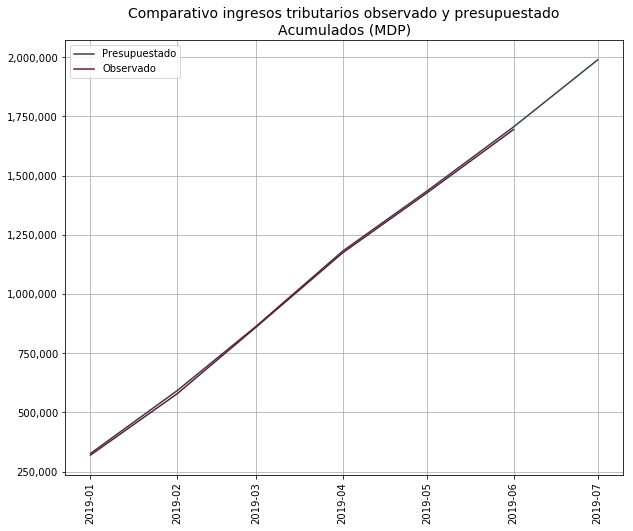

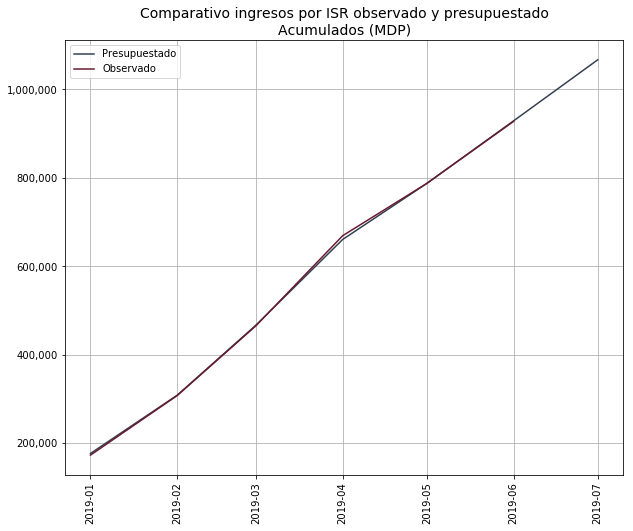

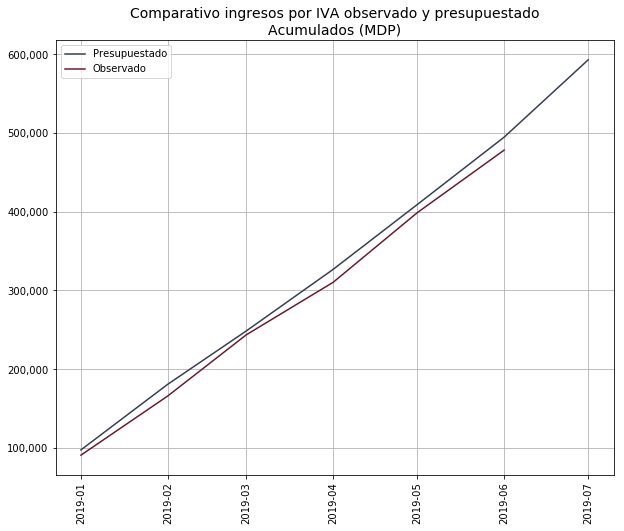

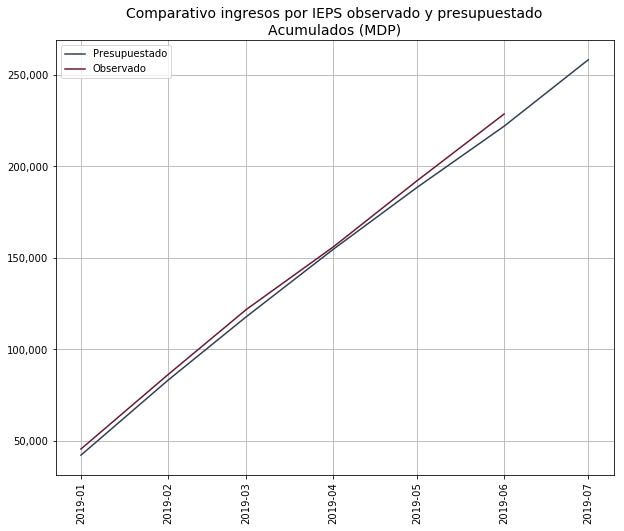

In [25]:
# Repetimos pero con ingresos acumulados (Hacemos cumsum)
for i in range(number_of_graphs):
    cols_to_plot = [presupuestados_a_comparar[i], observados_a_comparar[i]]
    titulo = 'Comparativo {} observado y presupuestado'.format(titulos[i])
    descriptive.plot_series(df=df_comparacion.cumsum(), cols=cols_to_plot, title=titulo,
                            subtitle='Acumulados (MDP)', legend=['Presupuestado', 'Observado'],
                            ticks='monthly', figsize=(10, 8),
                            min_date='{}-01-01'.format(params['anio']))

In [26]:
# Vemos cuadros comparativos. Usamos la funcion cross_tab_lif del script descriptive
for i in range(number_of_graphs):
    cols_to_plot = [presupuestados_a_comparar[i], observados_a_comparar[i]]
    display(descriptive.cross_tab_lif(df_comparacion, cols_to_plot, cumsum=True, absolute_change=True,
                                      perc_change=True, title=titulos[i]))

## Análisis de Ingresos Fiscales

La función plot_series, del script descriptive la uso mucho. Sirve para hacer una gráfica de los datos de un DataFrame. Veamos los argumentos que toma:

In [27]:
help(descriptive.plot_series)

Help on function plot_series in module descriptive:

plot_series(df, cols=None, title=None, subtitle=None, legend=None, save_to=None, min_date=None, max_date=None, ticks='auto', ticks_freq=1, figsize=(15, 8), legend_out=False, dpi=None, footnote=None, hline=None)
    La función plot_series sirve para hacer una gráfica de los datos de un DataFrame.
    Inputs:
        - df: DataFrame or Serie
        - cols: [str] (Nombres de las columnas a graficar) Default: Todo el DF
        - title: str (Título del gráfico). Default: None
        - subtitle: str (Subtítulo del gráfico). Default: None
        - legend: [str] (Legendas a utilizar) Default: Las legendas serán los nombres de las variables). 
        - save_to: 'str' (Filepath para guardar imagen) Defaults: None (No se guarda)
        - min_date: str or datetime. (Fecha a partir de la cual se verá la gráfica). Default: None (Se incluyen todas las fechas)
        - max_date: str or datetime. (Fecha máxima se verá la gráfica). Default: Non

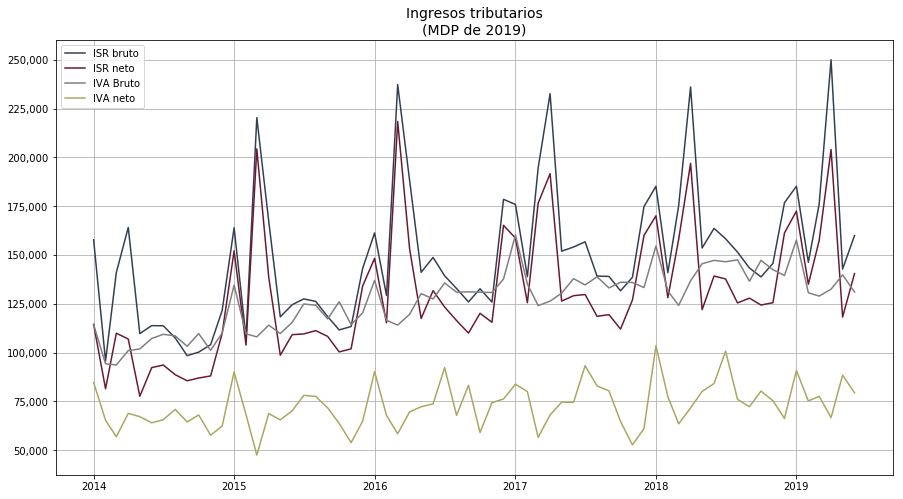

In [28]:
descriptive.plot_series(df = ingresos_totales,
                        cols = ['isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r'],
                        legend= ['ISR bruto', 'ISR neto', 'IVA Bruto', 'IVA neto'],
                        title='Ingresos tributarios', subtitle='(MDP de 2019)',
                        min_date='2014-01-01')

cross_tab es otra función muy utilizada. Hace una tabla comparativa por año y por mes de las variables indicadas. Argume tos:
- df: DF
- cols: [str]
- years: [int]
- ratios: Bool, Indica que las variables que es están analizando son ratios. Esto es indispensable para calcular los totales. Defaults: False
- cols_for_tot: [[str]] Si las variables son ratios, la función necesita los numeradores y denominadores para calcular el valor de los totales. Por cada variable que se incluya en columns, se debe incluir el par de variables que se usaron para construir. Default: None
- for_plot: Bool.  Sirve para que el resultado tenga los meses como columnas. En dado caso, la tabla es muy sencilla, solo con el objetivo de hacer una gráfica. Default: False
- notna: Bool: Solo incluir meses para los cuales haya valores para todos los años. Default: True
- absolute_change: Bool, calcular el cambio como porcentual o absoluto. Para variables que son ratios, creo que es mejor calcular el cambio como absoluto. Default False
    '''

In [40]:
ingresos_totales['isr_iva_bruto_(mdp)_r'] = ingresos_totales[['isr_bruto_(mdp)_r', 'iva_bruto_(mdp)_r']].sum(1)
ingresos_totales['isr_iva_neto_(mdp)_r'] = ingresos_totales[['isr_neto_(mdp)_r', 'iva_neto_(mdp)_r']].sum(1)
display(descriptive.cross_tab(df = ingresos_totales,
                      cols = ['ing_trib_neto_(mdp)_r'],
                      titles = ['Ingresos tributarios netos (MDP)'],
                      years = [2018, 2019],
                      perc_change=True,
                      absolute_change=True,
                      cumsum=True))
display(descriptive.cross_tab(df = ingresos_totales,
                      cols = ['isr_bruto_(mdp)_r', 'iva_bruto_(mdp)_r'],
                      titles = ['ISR bruto (MDP)', 'IVA bruto (MDP)'],
                      years = [2018, 2019],
                      perc_change=True,
                      absolute_change=True,
                      cumsum=True))
display(descriptive.cross_tab(df = ingresos_totales,
                      cols = ['isr_iva_bruto_(mdp)_r'],
                      titles = ['ISR + IVA bruto (MDP)'],
                      years = [2018, 2019],
                      perc_change=True,
                      cumsum=True))

# Análisis de compensaciones y devoluciones

### MDP de 2019

# Vamos a crear columna de compensaciones + devoluciones

In [44]:
[col for col in ingresos_totales.columns if 'reg' in col]

['iva_reg_(mdp)',
 'isr_reg_(mdp)',
 'ieps_reg_(mdp)',
 'iva_dev_comp_reg_(mdp)',
 'isr_dev_comp_reg_(mdp)',
 'ieps_dev_comp_reg_(mdp)',
 'iva_reg_(mdp)_r',
 'isr_reg_(mdp)_r',
 'ieps_reg_(mdp)_r',
 'iva_dev_comp_reg_(mdp)_r',
 'isr_dev_comp_reg_(mdp)_r',
 'ieps_dev_comp_reg_(mdp)_r',
 'iva_reg_%bruto',
 'iva_dev_comp_reg_%bruto',
 'isr_reg_%bruto',
 'isr_dev_comp_reg_%bruto',
 'ieps_reg_%bruto',
 'ieps_dev_comp_reg_%bruto']

In [21]:
ingresos_totales['isr_iva_dev_comp_(mdp)_r'] = ingresos_totales['iva_dev_comp_(mdp)_r'] +\
                                              ingresos_totales['isr_dev_comp_(mdp)_r']

ingresos_totales['isr_iva_ieps_dev_comp_(mdp)_r'] = ingresos_totales['isr_iva_dev_comp_(mdp)_r'] +\
                                                   ingresos_totales['ieps_dev_comp_(mdp)_r']

ingresos_totales['isr_iva_ieps_bruto_(mdp)_r'] = ingresos_totales['isr_iva_bruto_(mdp)_r'] +\
                                                ingresos_totales['ieps_bruto_(mdp)_r']

ingresos_totales['iva_isr_dev_comp_%bruto'] = (ingresos_totales['isr_iva_dev_comp_(mdp)_r'] /\
                                             ingresos_totales['isr_iva_bruto_(mdp)_r']) * 100

ingresos_totales['iva_isr_ieps_dev_comp_%bruto'] = (ingresos_totales['isr_iva_ieps_dev_comp_(mdp)_r'] /\
                                                   ingresos_totales['isr_iva_ieps_bruto_(mdp)_r']) * 100

In [22]:
display(descriptive.cross_tab(df = ingresos_totales,
                      cols = ['iva_comp_(mdp)_r', 'iva_dev_(mdp)_r', 'iva_dev_comp_(mdp)_r'],
                      titles = ['Compensaciones IVA (MDP)',\
                                'Devoluciones IVA (MDP)',\
                                'Devoluciones y compensaciones IVA (MDP)'],
                      years = [2018, 2019],
                      absolute_change=True,
                      perc_change=True,
                      cumsum=True))
display(descriptive.cross_tab(df = ingresos_totales,
                      cols = ['isr_comp_(mdp)_r', 'isr_dev_(mdp)_r', 'isr_dev_comp_(mdp)_r'],
                      titles = ['Compensaciones ISR (MDP)',\
                                'Devoluciones ISR (MDP)',\
                                'Devoluciones y compensaciones ISR (MDP)'],
                      years = [2018, 2019],
                      absolute_change=True,
                      perc_change=True,
                      cumsum=True))
display(descriptive.cross_tab(df = ingresos_totales,
                      cols = ['isr_iva_dev_comp_(mdp)_r', 'isr_iva_ieps_dev_comp_(mdp)_r'],
                      titles=['Devoluciones y compensaciones de IVA e ISR (MDP)',\
                              'Devoluciones y compensaciones de IVA, ISR e IEPS (MDP)'],
                      years = [2018, 2019],
                      absolute_change=True,
                      perc_change=True,
                      cumsum=True,
                      style=True))

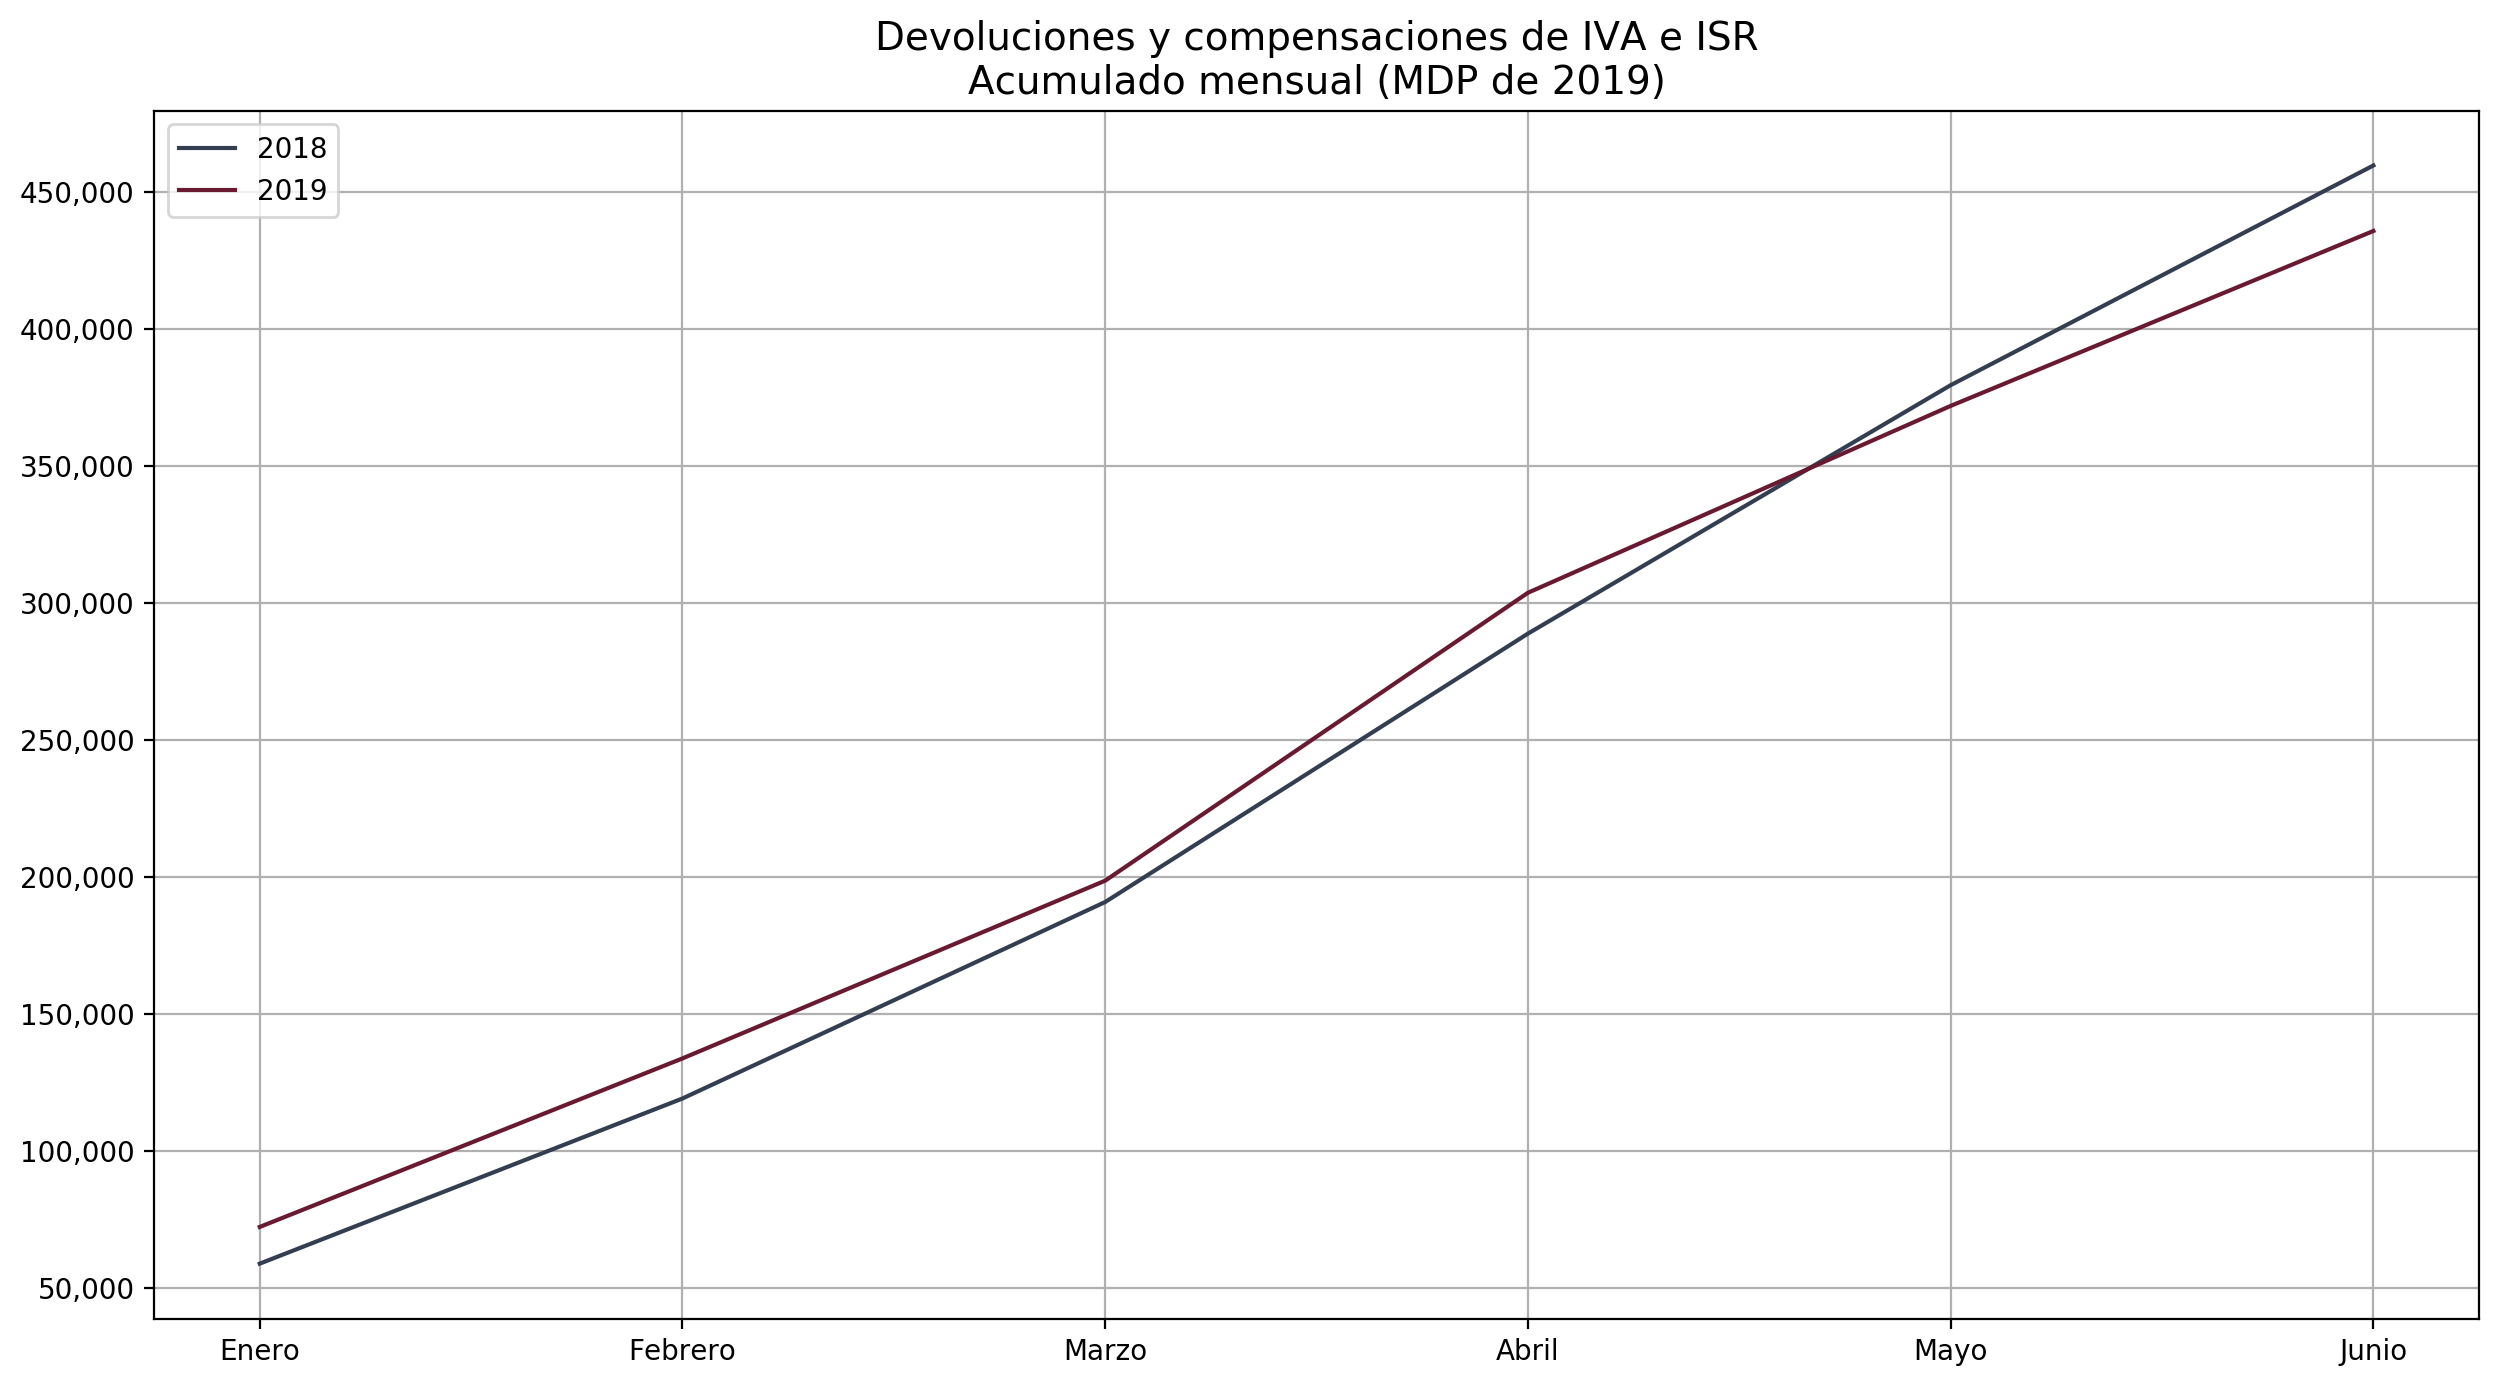

In [23]:
devcomp = descriptive.cross_tab(df = ingresos_totales,
                      cols = ['isr_iva_dev_comp_(mdp)_r', 'isr_iva_ieps_dev_comp_(mdp)_r'],
                      years = [2018, 2019],
                      cumsum=True,
                      style=False)
descriptive.plot_series(devcomp['isr_iva_dev_comp_(mdp)_r acumulado'],
                        title = 'Devoluciones y compensaciones de IVA e ISR',
                        subtitle = 'Acumulado mensual (MDP de 2019)',
                        dpi=200)

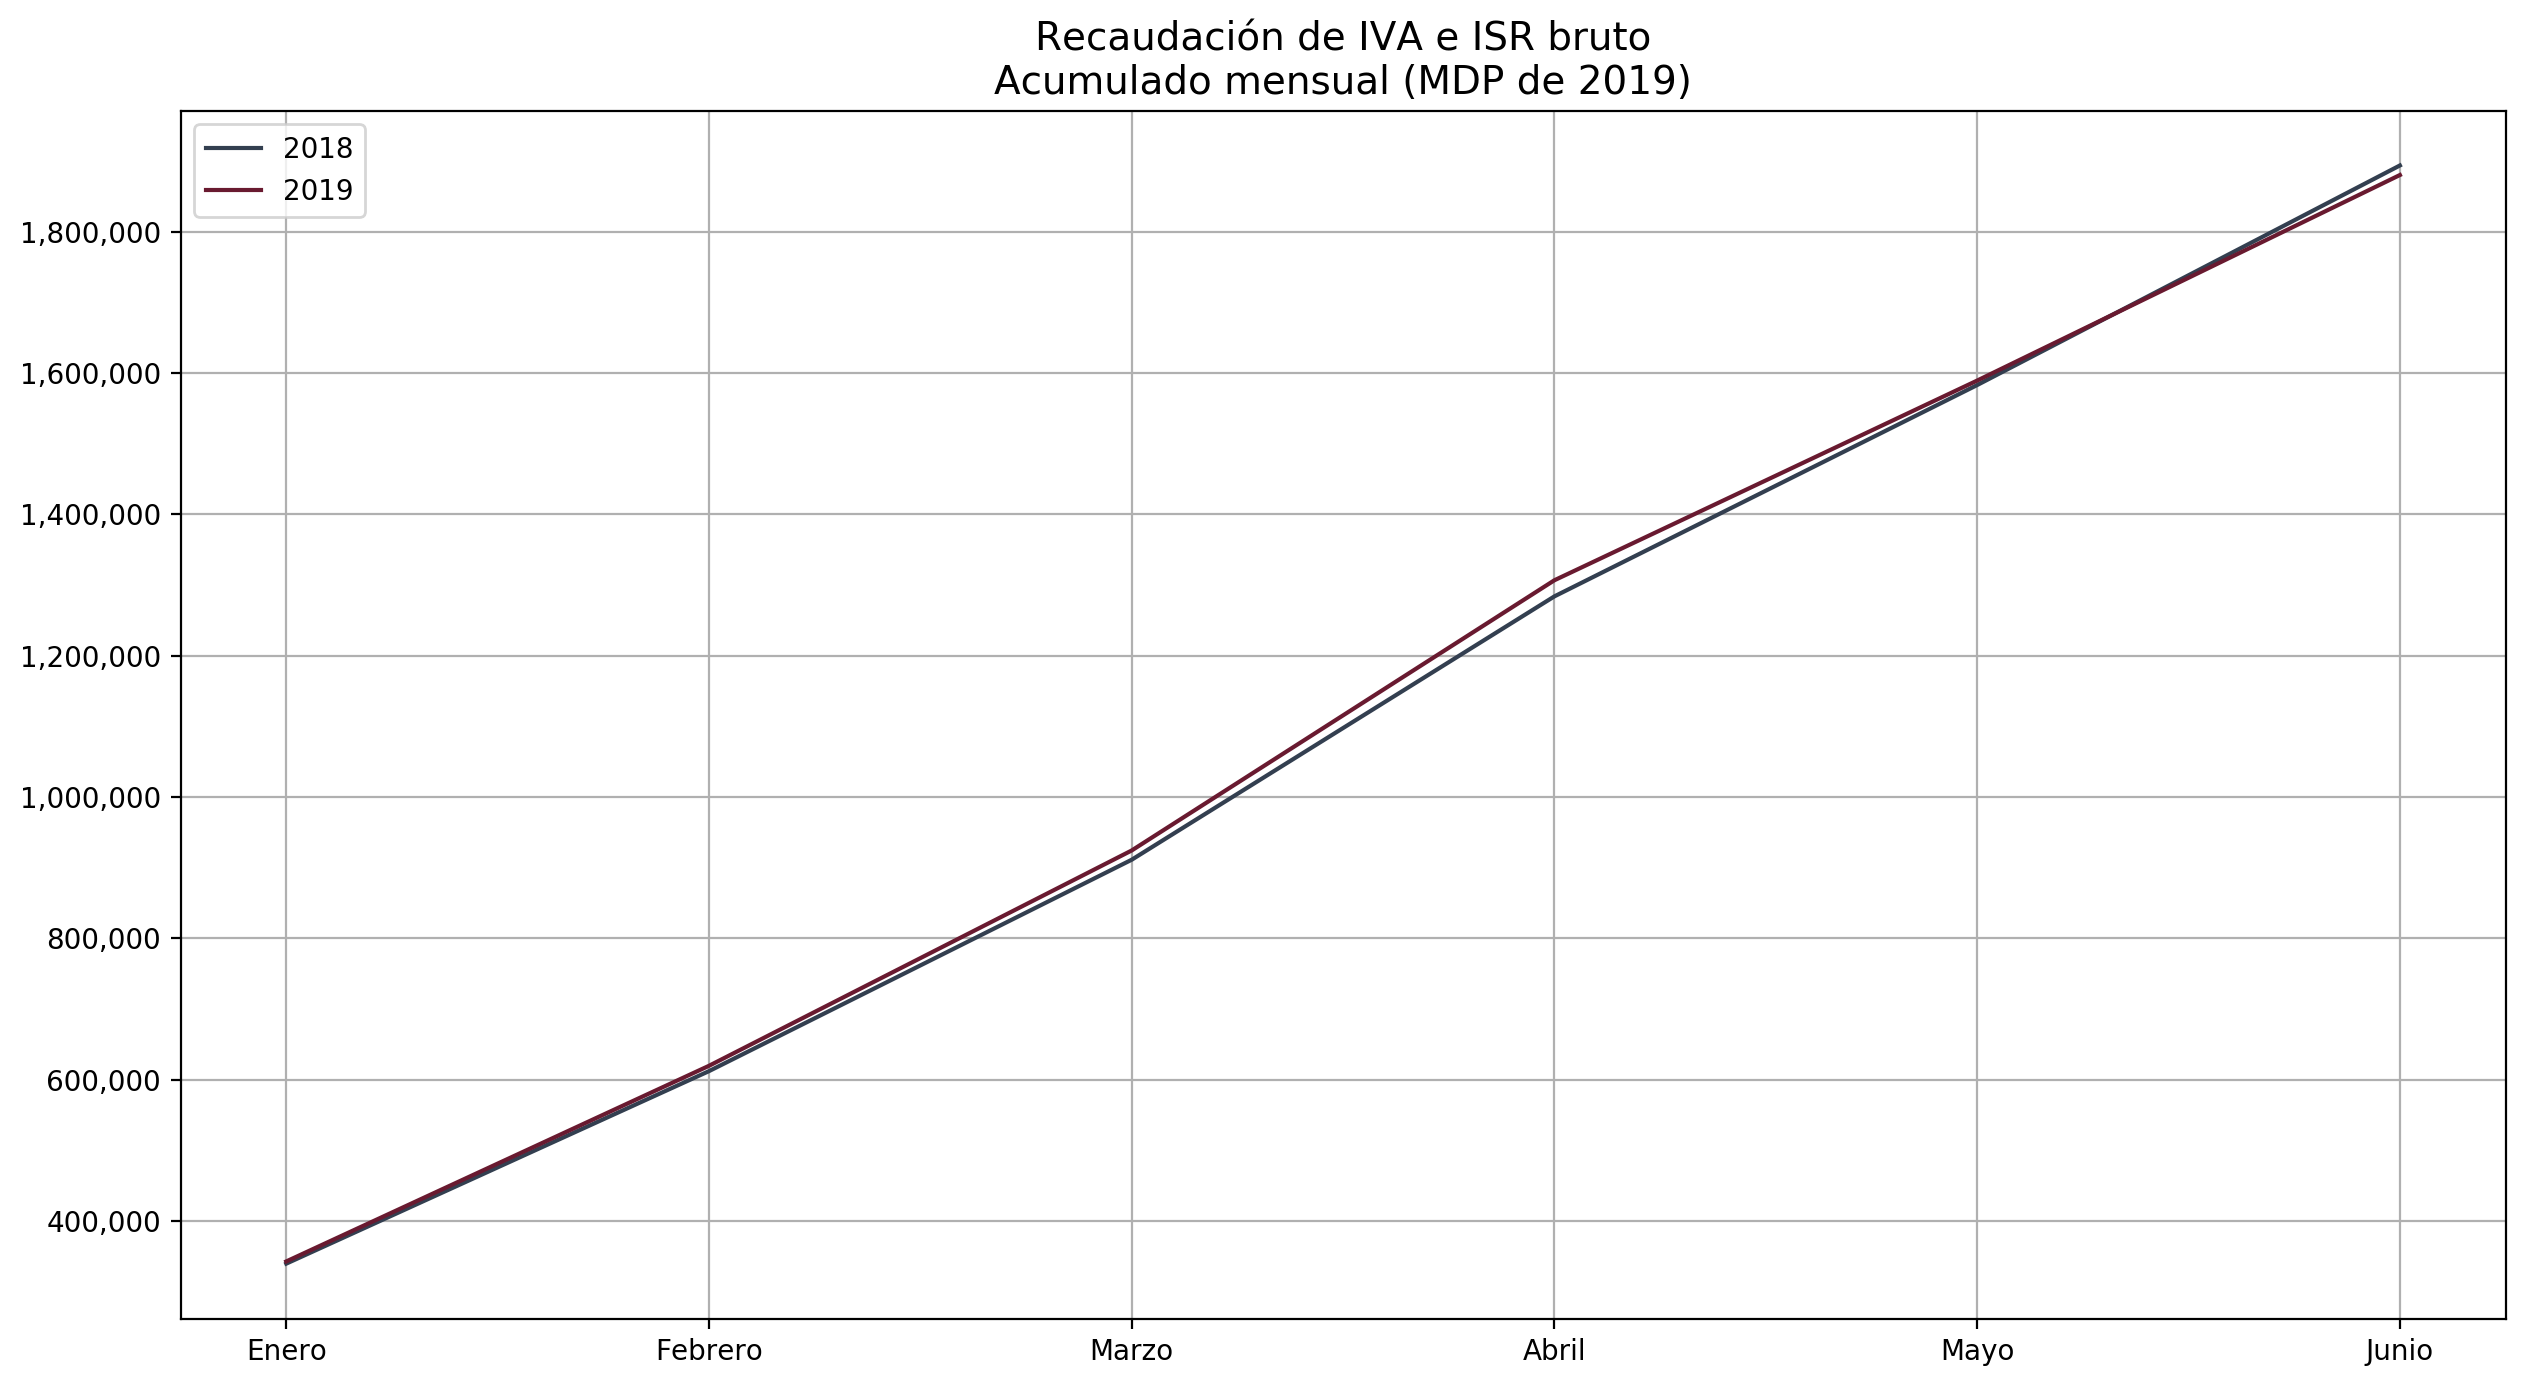

In [24]:
totals = descriptive.cross_tab(df = ingresos_totales,
                               cols = ['isr_iva_bruto_(mdp)_r'],
                               years = [2018, 2019],
                               cumsum=True,
                               style=False)
descriptive.plot_series(totals['isr_iva_bruto_(mdp)_r acumulado'],
                        title = 'Recaudación de IVA e ISR bruto',
                        subtitle='Acumulado mensual (MDP de 2019)',
                        dpi=200)

### % del Bruto

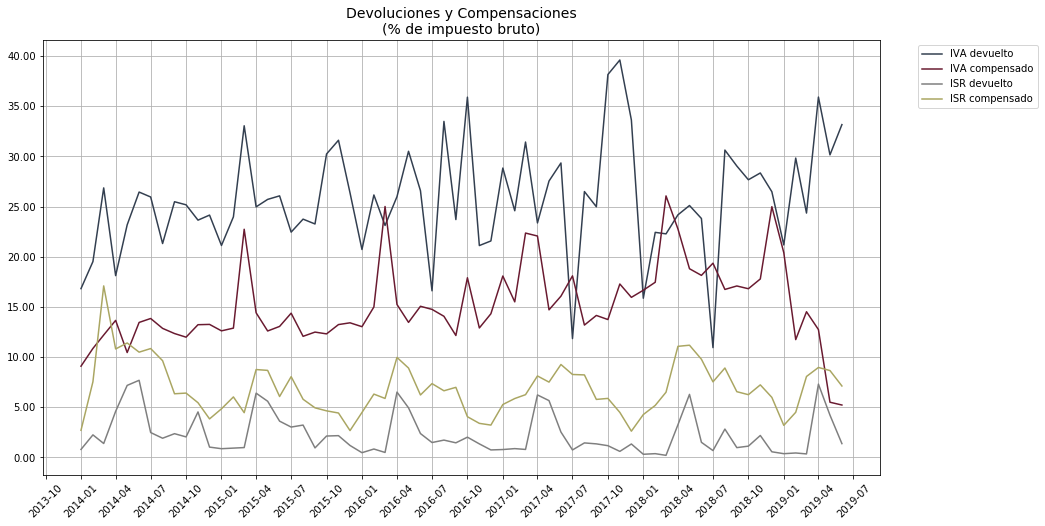

In [25]:
descriptive.plot_series(df = ingresos_totales,
                        cols = ['iva_dev_%bruto', 'iva_comp_%bruto',
                                'isr_dev_%bruto', 'isr_comp_%bruto'],
                        legend= ['IVA devuelto', 'IVA compensado',\
                                 'ISR devuelto', 'ISR compensado'],
                        title='Devoluciones y Compensaciones',
                        subtitle='(% de impuesto bruto)',ticks='quarterly',
                        legend_out=True)

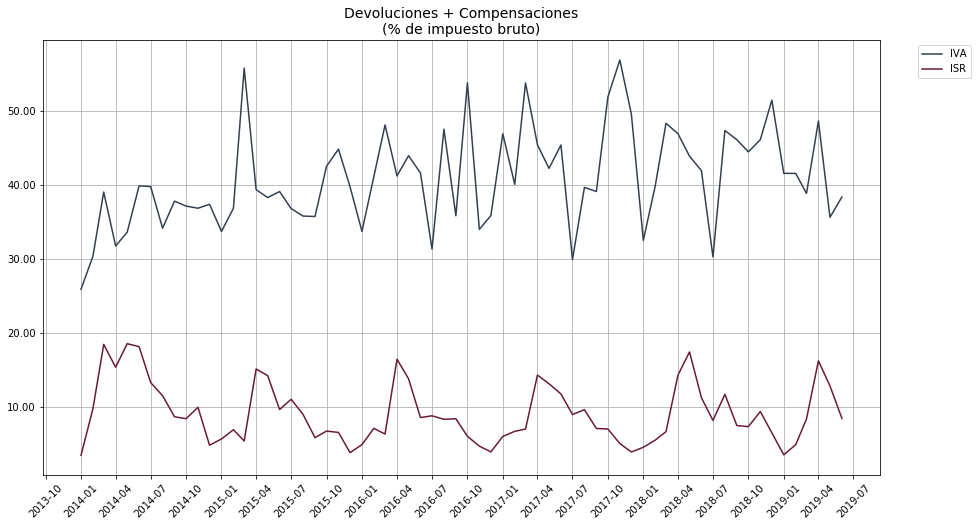

In [26]:
descriptive.plot_series(df = ingresos_totales,
                        cols = ['iva_dev_comp_%bruto', 'isr_dev_comp_%bruto'],
                        legend= ['IVA', 'ISR'],
                        title='Devoluciones + Compensaciones',
                        subtitle='(% de impuesto bruto)',ticks='quarterly',
                        legend_out=True)

# Eficiencia recaudatoria

Para analizar la eficiencia recaudatoria el primer paso es estimar el PIB para trimestre relevante. Así podremos obtener un aproximado de eficiencia recaudatoria para Abri y para Mayo. El PIB se aproxima usando el IGAE.

- Si el usuario indica que quiere usar el crecimiento del último IGAE:
   - Usamos el crecimiento del IGAE del último mes para estimar el crecimiento del PIB del trimestre relevante.
   - Calculamos la desviación estándar del crecimiento del IGAE. Hacemos 4 escenarios de crecimiento adicionales: +/- 1 desviación estandar y +/- 0.5 desviaciones estándar.

- Si el usuario indica que quiere usar el mismo crecimiento del año pasado:
   - Usamos el crecimiento del PIB del trimestre a predecir del año anterios para estimar el crecimiento del PIB del trimestre relevante.
   - Calculamos la desviación estándar del crecimiento del PIB. Hacemos 4 escenarios de crecimiento adicionales: +/- 1 desviación estandar y +/- 0.5 desviaciones estándar.

- Si el usuario indica que quiere usar el crecimiento de la SHCP:
   - Usamos el estimado de crecimiento de SHCP, para obtener el crecimiento promedio que deberia tener el PIB para llegar a él.
   - Calculamos la desviación estándar del crecimiento del PIB. Hacemos 4 escenarios de crecimiento adicionales: +/- 1 desviación estandar y +/- 0.5 desviaciones estándar.

- Si el usuario indica que quiere usar el crecimiento de Banxico, repetimos el proceso que con SHCP.

- Si el usuario indica un crecimiento anual propio, usamos ese crecimiento anual y el mismo proceso que para la SHCP.

- Para los métodos de SHCP, Banxico y crecimiento propio, si el usuario quiere un crecimiento que incorpore estacionalidad, primero se obtiene una predicción del crecimiento del PIB usando el método Hot Winters, y después se ajusta esa estimación para que concuerde con el crecimiento anual indicado


#### Vamos a obtener la tasa de crecimiento que utilizaremos. 

In [27]:
# Creamos un DF conjunto. Hacemos merge tipo left para quedarnos con todas las observaciones que tienen
# ingresos fiscales sin importar si hay o no hay PIB.
ingresos_pib_df = pd.merge(ingresos_totales, pib_r_df, left_index = True, right_index=True, how='left')
# Obtenemos los meses para los cuales no hay P
months_to_predict_pib = ingresos_pib_df[ingresos_pib_df['pibr_2019'].isna()].index
# Obtenemos el trimestre que vamos a predecir usando el valor del primer mes a predecir, haciendo la siguiente
# operación: trimestre = (((mes - 1) / 3) + 1). Así, 01 -> 01, 04 -> 02, 07 -> 03 y 10 -> 04
quarter_to_predict = ((months_to_predict_pib[0].month - 1) / 3) + 1

In [28]:
# Construimos el crecimiento porcentual del PIB
pib_pct_change = pib_r_df.loc[pib_r_df['pibr_2019'].notna(), 'pibr_2019'].pct_change(12)

In [30]:
# Obtenemos crecimiento porcentual del PIB observado del año en curso
average_observed_growth = pib_pct_change.loc[pib_pct_change.index >= '2019-01-01'].mean()
# Obtenemos el número de recimientos observados del año en curso.
growths_observed = pib_pct_change.loc[pib_pct_change.index >= '2019-01-01'].count()
# Obtenemos el número de crecimiento que aun no se observan.
growths_not_observed = 12 - growths_observed

if not params['pib_prediction'] in ['igae', 'pib_last_year']:
    if params['pib_prediction'] == 'banxico':
        objective_growth = params['estimacion_crecimiento_banxico'] / 100

    if params['pib_prediction'] == 'shcp':
        objective_growth = params['estimación_crecimiento_SHCP'] / 100

    if isinstance(params['pib_prediction'], int) or isinstance(params['pib_prediction'], float):
        objective_growth = params['pib_prediction'] / 100

    if not params['adjust_seasonality']:
        growth_to_use = (((12 * objective_growth) - (average_observed_growth * growths_observed))
                         / growths_not_observed)
    # Si el usuario quiere una predicción que tome en cuenta la estacionalidad, vamos a predecir usando Holt Winters
    # Despues ajustaremos esta predicción para que el resultado de ajute al crecimiento indicado por el usuario.
    # Si se usa el IGAE, no tiene sentido obtener este ajsute estacional.
    else:    
        # Convertimos el PIB a trimestral
        pib_pct_change_trim = pib_pct_change.resample('QS').mean()
        # Eliminamos valores con NA para poder estimar el modelo
        pib_pct_change_trim = pib_pct_change_trim.loc[pib_pct_change_trim.notna()]
        # Los trimestres del año a predecir
        trims = pd.date_range('2019-01-01', '2019-12-01', freq='QS')
        # Obtenemos los trimestres que hemos observado
        trims_observed = pib_pct_change_trim.loc[pib_pct_change_trim.index >= '2019-01-01'].index
        # Obtenemos los trimestres del año que no hemos observado
        trims_to_predict = [trim for trim in trims if trim not in trims_observed]
        # Obtenemos el primer trimestre a predecir
        first_trim_to_predict = trims_to_predict[0]
        # Obtenemos el último trimestre a predecir
        last_trim_to_predict = trims_to_predict[-1]
        # Construimos el modelo con tendencia y estacionalidad aditiva.
        model = ExponentialSmoothing(pib_pct_change_trim, trend='add', seasonal='add', seasonal_periods=4).fit()
        # Construimos las predicciones
        pred = model.predict(start=first_trim_to_predict, end=last_trim_to_predict)
        # Obtenemos el precimiento promedio de los trimestres predichos
        avg_predicted_growth = pred.mean()
        # Obtenemos un multiplicador, que el valor por el cual tenemos que multiplicar la serie de crecimientos
        # del PIB del año para que de el crecimiento objetivo.
        necesary_predicted_avg_growth = (((12 * objective_growth) - (average_observed_growth * growths_observed))
                                             / growths_not_observed)
        # obtenemos el multiplicador
        multiplicador = necesary_predicted_avg_growth / avg_predicted_growth
        # Multiplicamos las predicciones
        pred_corrected = pred * multiplicador
        # Hacemos serie completa
        predicted_q_growth = pd.concat([pib_pct_change_trim, pred_corrected], axis=0)
        # Obtenemos la predicción de crecimiento para el trimestre relevante y la multiplicamos pr el multiplicador
        growth_to_use = predicted_q_growth[first_trim_to_predict]
        # Imprimimos notificacion:

if params['pib_prediction'] == 'igae':
    igae_pct_change = igae.pct_change(12)
    growth_to_use = float(igae_pct_change.iloc[-1])
    last_month_igae = igae_pct_change.iloc[-1].month
    
if params['pib_prediction'] == 'pib_last_year':
    growth_to_use = pib_pct_change[months_to_predict_pib[0] - relativedelta(years=1)]

### Creamos explicación del crecimiento. 

In [31]:
if params['pib_prediction'] == 'shcp':
    if not params['adjust_seasonality']:
        explanation = '''
Se usó estimación de crecimiento anual del PIB de la SHCP de {:.2f}%, no ajustando por estacionalidad, 
para obtener crecimento del PIB del {:.0f} trimestre de {:.2f}%'''.format(
    (objective_growth) * 100, quarter_to_predict, growth_to_use * 100)
    else:
        explanation = '''
Se usó estimación de crecimiento anual del PIB de la SHCP de {:.2f}%, ajustando por estacionalidad con el
método Holt Winters, para obtener crecimento del PIB del {:.0f} trimestre de {:.2f}%'''.format(
    (objective_growth) * 100, quarter_to_predict, growth_to_use * 100)

if params['pib_prediction'] == 'Banxico':
    if not params['adjust_seasonality']:
        explanation = '''
Se usó estimación de crecimiento anual del PIB de Banxico de {:.2f}%, no ajustando por estacionalidad, 
para obtener crecimento del PIB del {:.0f} trimestre de {:.2f}%'''.format(
    (objective_growth) * 100, quarter_to_predict, growth_to_use * 100)
    else:
        explanation = '''
Se usó estimación de crecimiento anual del PIB de la SHCP de {:.2f}%, ajustando por estacionalidad con el
método Holt Winters, para obtener crecimento del PIB del {:.0f} trimestre de {:.2f}%'''.format(
    (objective_growth) * 100, quarter_to_predict, growth_to_use * 100)

if isinstance(params['pib_prediction'], int) or isinstance(params['pib_prediction'], float):
    if not params['adjust_seasonality']:
        explanation = '''
Se usó estimación de crecimiento anual del PIB {:.2f}%, no ajustando por estacionalidad, 
para obtener crecimento del PIB del {:.0f} trimestre de {:.2f}%'''.format(
    (objective_growth) * 100, quarter_to_predict, growth_to_use * 100)
    else:
        explanation = '''
Se usó estimación de crecimiento anual del PIB de {:.2f}%, ajustando por estacionalidad con el
método Holt Winters, para obtener crecimento del PIB del {:.0f} trimestre de {:.2f}%'''.format(
    (objective_growth) * 100, quarter_to_predict, growth_to_use * 100)

if params['pib_prediction'] == 'igae':
    explanation  = '''
Se usó crecimiento anual del IGAE del {} mes del año, para obtener el crecimiento predicho del
PIB del {:.0f} trimestre de {:.2f}%'''.format(
      last_month_igae, quarter_to_predict, growth_to_use * 100)

if params['pib_prediction'] == 'pib_last_year':
    explanation  = '''
Se usó crecimiento anual del PIB del {} trimestre del año anterior, para obtener el crecimiento
predicho del PIB del {:.0f} trimestre de {:.2f}%'''.format(
      last_month_igae, quarter_to_predict, growth_to_use * 100)

print(explanation)
                                     


Se usó estimación de crecimiento anual del PIB de 0.60%, ajustando por estacionalidad con el
método Holt Winters, para obtener crecimento del PIB del 2 trimestre de 0.41%


#### Predecimos 

In [32]:
months_to_predict_pib

DatetimeIndex(['2019-04-01', '2019-05-01', '2019-06-01'], dtype='datetime64[ns]', name='fecha', freq='MS')

In [33]:
# Creamos una lista en la que pondremos los nombres de las predicciones
prediction_names_l = ['pibr_2019']
# Creamos un nuevo DataFrame sobre el cual pondremos las predicciones. SOlo usamos los valores después de 2014.
# Indico .copy() para que Pandas sepa que yo sé que estoy haciendo una copia y no me advierta al hacer
# modicaciones en la nueva DF.
pib_r_df_predict = pib_r_df.loc[pib_r_df.index >= '2014-01-01'].copy()
# Creamos el nombre de la variable que vamos a usar:
prediction_name = 'pib_r_2019_{0:.2f}%'.format(growth_to_use * 100)
# Ampliamos lista con los nombres de las predicciones, esto lo usaremos mas adelante.
prediction_names_l.append(prediction_name)
# Vamos a crear una lista con los valores de crecimiento, lo usaremos mas adelante:
growth_rates = [growth_to_use * 100]
# Creamos una nueva columna identica al pibr_2019 con el nombre 'pib_r_2019_crecimiento'
pib_r_df_predict[prediction_name] = pib_r_df_predict['pibr_2019']
# Ampliamos el DataFrame para que incluya abril y mayo de 2019. 'MS' indica Month Start, que son las fechas
# que estamos usando.
pib_r_df_predict = pib_r_df_predict.reindex(pd.date_range('2014-01-01', months_to_predict_pib.max(), freq='MS'))
# Obtenemos el mes que usaremos como base
base_date = months_to_predict_pib[0] - relativedelta(years=1)
# Obtengo el valor del pib que usaremos para predecir.
prediction_pib_base = pib_r_df_predict.loc[base_date, prediction_name]
# Asignamos el valor de la nueva variable para los a predecir como la multiplicación de la
# valor base de la predicción * (1 + la tasa de crecimiento). Los convierto a float porque actualmente
# son Pandas Series de 1 observacion, y los necesitamos como numeros.
pib_r_df_predict.loc[months_to_predict_pib, prediction_name] = \
    float(prediction_pib_base) * (1 + growth_to_use)

In [34]:
# Veamos los valores predichos
pib_r_df_predict.loc['2017-01-01':].resample('QS').mean().to_csv('../results/prediccion_pib.csv', index=False)

In [35]:
pib_r_df_y = download.load_pib_r()

In [36]:
pib_r_df_y.pct_change(4)

pibr_2013  pibr_2019
fecha                           
1980-01-01        NaN        NaN
1980-04-01        NaN        NaN
1980-07-01        NaN        NaN
1980-10-01        NaN        NaN
1981-01-01   0.090268   0.090268
1981-04-01   0.116937   0.116937
1981-07-01   0.097912   0.097912
1981-10-01   0.075650   0.075650
1982-01-01   0.034376   0.034376
1982-04-01   0.007596   0.007596
1982-07-01  -0.001473  -0.001473
1982-10-01  -0.039152  -0.039152
1983-01-01  -0.046007  -0.046007
1983-04-01  -0.057091  -0.057091
1983-07-01  -0.052997  -0.052997
1983-10-01  -0.018113  -0.018113
1984-01-01   0.032562   0.032562
1984-04-01   0.029333   0.029333
1984-07-01   0.045705   0.045705
1984-10-01   0.032262   0.032262
1985-01-01   0.018391   0.018391
1985-04-01   0.030965   0.030965
1985-07-01   0.009092   0.009092
1985-10-01   0.016611   0.016611
1986-01-01  -0.038718  -0.038718
1986-04-01  -0.009168  -0.009168
1986-07-01  -0.051711  -0.051711
1986-10-01  -0.049173  -0.049173
1987-01-01  -0.010876  -0.010876
1987-04-01   0.004038   0.004038
1987-07-01   0.034576   0.034576
1987-10-01   0.056659   0.056659
1988-01-01   0.031893   0.031893
1988-04-01   0.012284   0.012284
1988-07-01  -0.000789  -0.000789
1988-10-01   0.007933   0.007933
1989-01-01   0.023508   0.023508
1989-04-01   0.042773   0.042773
1989-07-01   0.052394   0.052394
1989-10-01   0.028308   0.028308
1990-01-01   0.045399   0.045399
1990-04-01   0.039276   0.039276
1990-07-01   0.051222   0.051222
1990-10-01   0.072212   0.072212
1991-01-01   0.033886   0.033886
1991-04-01   0.055354   0.055354
1991-07-01   0.032736   0.032736
1991-10-01   0.039045   0.039045
1992-01-01   0.046805   0.046805
1992-04-01   0.021604   0.021604
...               ...        ...
2006-10-01   0.034556   0.034556
2007-01-01   0.020256   0.020256
2007-04-01   0.019920   0.019920
2007-07-01   0.024067   0.024067
2007-10-01   0.027298   0.027298
2008-01-01   0.011790   0.011790
2008-04-01   0.026211   0.026211
2008-07-01   0.013271   0.013271
2008-10-01  -0.005253  -0.005253
2009-01-01  -0.055706  -0.055706
2009-04-01  -0.089260  -0.089260
2009-07-01  -0.049905  -0.049905
2009-10-01  -0.016007  -0.016007
2010-01-01   0.045051   0.045051
2010-04-01   0.070324   0.070324
2010-07-01   0.048448   0.048448
2010-10-01   0.041435   0.041435
2011-01-01   0.036953   0.036953
2011-04-01   0.027649   0.027649
2011-07-01   0.040516   0.040516
2011-10-01   0.041281   0.041281
2012-01-01   0.048105   0.048105
2012-04-01   0.039851   0.039851
2012-07-01   0.027485   0.027485
2012-10-01   0.030961   0.030961
2013-01-01   0.006441   0.006441
2013-04-01   0.020928   0.020928
2013-07-01   0.014625   0.014625
2013-10-01   0.012051   0.012051
2014-01-01   0.026412   0.026412
2014-04-01   0.022865   0.022865
2014-07-01   0.028358   0.028358
2014-10-01   0.034296   0.034296
2015-01-01   0.034830   0.034830
2015-04-01   0.030050   0.030050
2015-07-01   0.039927   0.039927
2015-10-01   0.027057   0.027057
2016-01-01   0.029894   0.029894
2016-04-01   0.032954   0.032954
2016-07-01   0.020630   0.020630
2016-10-01   0.032863   0.032863
2017-01-01   0.034764   0.034764
2017-04-01   0.019448   0.019448
2017-07-01   0.015727   0.015727
2017-10-01   0.015388   0.015388
2018-01-01   0.012203   0.012203
2018-04-01   0.025834   0.025834
2018-07-01   0.024885   0.024885
2018-10-01   0.016890   0.016890
2019-01-01   0.012463   0.012463

[157 rows x 2 columns]

In [38]:
# Añadiremos cuatro predicciones adicionales usando la desviación estándar del crecimiento del PIB desde 2014
# = 0.015.
pib_pct_change.loc[pib_pct_change.index >= '2014-01-01'].describe()

count    63.000000
mean      0.025607
std       0.007949
min       0.012203
25%       0.019448
50%       0.026412
75%       0.032863
max       0.039927
Name: pibr_2019, dtype: float64

In [39]:
# Guardamos la deviación estándard en una variable
pib_pct_change_std = float(pib_pct_change.loc[pib_pct_change.index >= '2014-01-01'].std())

In [40]:
# repetimos el procedimiento anterior para cada uno de los valores que multiplicarán la desviación estándar.
# El valor del pib que usaremos para predecir ya lo obtuvimos.
# Vamos a crear una lista con los nombres de las predicciones, esto lo usaremos mas adelante.
for val in [-1, -0.5, 0.5, 1]:
    # Modificamos último crecimiento sumando la multiplicación entre el valor del loop y la desviación estándar
    growth_to_use_modified = growth_to_use + (val * pib_pct_change_std)
    # Ampliamos la lista de las tasas de crecimiento
    growth_rates.append(growth_to_use_modified * 100)
    # Creamos el nombre de la variable que vamos a usar. Cuando escribes un string '{}'.format(x), la x 
    # se colocará en lugar de los corchetes. {0:.3f} indica que la x será un numero y que queremos ver
    # solo 2 decimales.
    prediction_name = 'pib_r_2019_{0:.2f}%'.format(growth_to_use_modified * 100)
    # Ampliamos la lista de las predicciones con el nuevo nombre.
    prediction_names_l.append(prediction_name)
    # Creamos una nueva columna identica al pibr_2019 con el nombre 'pib_r_2019_crecimiento'
    pib_r_df_predict[prediction_name] = pib_r_df_predict['pibr_2019']
    # Asignamos el valor de la nueva variable para los meses a predecir como la multiplicación de la
    # valor base de la predicción * (1 + la tasa de crecimiento). Los convierto a float porque actualmente
    # son Pandas Series de 1 observacion, y los necesitamos como numeros.
    pib_r_df_predict.loc[months_to_predict_pib, prediction_name] = \
        float(prediction_pib_base) * (1 + growth_to_use_modified)

In [41]:
pib_r_df_predict

pibr_2013     pibr_2019  pib_r_2019_0.41%  pib_r_2019_-0.39%  \
2014-01-01  1.613549e+07  2.031538e+07      2.031538e+07       2.031538e+07   
2014-02-01  1.613549e+07  2.031538e+07      2.031538e+07       2.031538e+07   
2014-03-01  1.613549e+07  2.031538e+07      2.031538e+07       2.031538e+07   
2014-04-01  1.673687e+07  2.107254e+07      2.107254e+07       2.107254e+07   
2014-05-01  1.673687e+07  2.107254e+07      2.107254e+07       2.107254e+07   
2014-06-01  1.673687e+07  2.107254e+07      2.107254e+07       2.107254e+07   
2014-07-01  1.664505e+07  2.095694e+07      2.095694e+07       2.095694e+07   
2014-08-01  1.664505e+07  2.095694e+07      2.095694e+07       2.095694e+07   
2014-09-01  1.664505e+07  2.095694e+07      2.095694e+07       2.095694e+07   
2014-10-01  1.741720e+07  2.192911e+07      2.192911e+07       2.192911e+07   
2014-11-01  1.741720e+07  2.192911e+07      2.192911e+07       2.192911e+07   
2014-12-01  1.741720e+07  2.192911e+07      2.192911e+07       2.192911e+07   
2015-01-01  1.669750e+07  2.102297e+07      2.102297e+07       2.102297e+07   
2015-02-01  1.669750e+07  2.102297e+07      2.102297e+07       2.102297e+07   
2015-03-01  1.669750e+07  2.102297e+07      2.102297e+07       2.102297e+07   
2015-04-01  1.723982e+07  2.170578e+07      2.170578e+07       2.170578e+07   
2015-05-01  1.723982e+07  2.170578e+07      2.170578e+07       2.170578e+07   
2015-06-01  1.723982e+07  2.170578e+07      2.170578e+07       2.170578e+07   
2015-07-01  1.730964e+07  2.179369e+07      2.179369e+07       2.179369e+07   
2015-08-01  1.730964e+07  2.179369e+07      2.179369e+07       2.179369e+07   
2015-09-01  1.730964e+07  2.179369e+07      2.179369e+07       2.179369e+07   
2015-10-01  1.788846e+07  2.252246e+07      2.252246e+07       2.252246e+07   
2015-11-01  1.788846e+07  2.252246e+07      2.252246e+07       2.252246e+07   
2015-12-01  1.788846e+07  2.252246e+07      2.252246e+07       2.252246e+07   
2016-01-01  1.719665e+07  2.165143e+07      2.165143e+07       2.165143e+07   
2016-02-01  1.719665e+07  2.165143e+07      2.165143e+07       2.165143e+07   
2016-03-01  1.719665e+07  2.165143e+07      2.165143e+07       2.165143e+07   
2016-04-01  1.780794e+07  2.242107e+07      2.242107e+07       2.242107e+07   
2016-05-01  1.780794e+07  2.242107e+07      2.242107e+07       2.242107e+07   
2016-06-01  1.780794e+07  2.242107e+07      2.242107e+07       2.242107e+07   
2016-07-01  1.766673e+07  2.224329e+07      2.224329e+07       2.224329e+07   
2016-08-01  1.766673e+07  2.224329e+07      2.224329e+07       2.224329e+07   
2016-09-01  1.766673e+07  2.224329e+07      2.224329e+07       2.224329e+07   
2016-10-01  1.847632e+07  2.326260e+07      2.326260e+07       2.326260e+07   
2016-11-01  1.847632e+07  2.326260e+07      2.326260e+07       2.326260e+07   
2016-12-01  1.847632e+07  2.326260e+07      2.326260e+07       2.326260e+07   
2017-01-01  1.779448e+07  2.240412e+07      2.240412e+07       2.240412e+07   
2017-02-01  1.779448e+07  2.240412e+07      2.240412e+07       2.240412e+07   
2017-03-01  1.779448e+07  2.240412e+07      2.240412e+07       2.240412e+07   
2017-04-01  1.815426e+07  2.285711e+07      2.285711e+07       2.285711e+07   
2017-05-01  1.815426e+07  2.285711e+07      2.285711e+07       2.285711e+07   
2017-06-01  1.815426e+07  2.285711e+07      2.285711e+07       2.285711e+07   
2017-07-01  1.794458e+07  2.259311e+07      2.259311e+07       2.259311e+07   
2017-08-01  1.794458e+07  2.259311e+07      2.259311e+07       2.259311e+07   
2017-09-01  1.794458e+07  2.259311e+07      2.259311e+07       2.259311e+07   
2017-10-01  1.876064e+07  2.362057e+07      2.362057e+07       2.362057e+07   
2017-11-01  1.876064e+07  2.362057e+07      2.362057e+07       2.362057e+07   
2017-12-01  1.876064e+07  2.362057e+07      2.362057e+07       2.362057e+07   
2018-01-01  1.801162e+07  2.267751e+07      2.267751e+07       2.267751e+07   
2018-02-01  1.801162e+07  2.267751e+07      2.267751e+07       2.

## Calculamos valores porcentuales

In [42]:
# Para calcular la eviciencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df = pd.DataFrame(index=ingresos_totales.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_totales[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df[nombre_variable_ef] = (impuesto / prediction_pib) * 100

In [43]:
#Veamos los valores de eficiencia 
eficiencia_df

iva_bruto_%PIB_pibr_2019  iva_bruto_%PIB_0.41%  \
fecha                                                        
1990-01-01                       NaN                   NaN   
1990-02-01                       NaN                   NaN   
1990-03-01                       NaN                   NaN   
1990-04-01                       NaN                   NaN   
1990-05-01                       NaN                   NaN   
1990-06-01                       NaN                   NaN   
1990-07-01                       NaN                   NaN   
1990-08-01                       NaN                   NaN   
1990-09-01                       NaN                   NaN   
1990-10-01                       NaN                   NaN   
1990-11-01                       NaN                   NaN   
1990-12-01                       NaN                   NaN   
1991-01-01                       NaN                   NaN   
1991-02-01                       NaN                   NaN   
1991-03-01                       NaN                   NaN   
1991-04-01                       NaN                   NaN   
1991-05-01                       NaN                   NaN   
1991-06-01                       NaN                   NaN   
1991-07-01                       NaN                   NaN   
1991-08-01                       NaN                   NaN   
1991-09-01                       NaN                   NaN   
1991-10-01                       NaN                   NaN   
1991-11-01                       NaN                   NaN   
1991-12-01                       NaN                   NaN   
1992-01-01                       NaN                   NaN   
1992-02-01                       NaN                   NaN   
1992-03-01                       NaN                   NaN   
1992-04-01                       NaN                   NaN   
1992-05-01                       NaN                   NaN   
1992-06-01                       NaN                   NaN   
1992-07-01                       NaN                   NaN   
1992-08-01                       NaN                   NaN   
1992-09-01                       NaN                   NaN   
1992-10-01                       NaN                   NaN   
1992-11-01                       NaN                   NaN   
1992-12-01                       NaN                   NaN   
1993-01-01                       NaN                   NaN   
1993-02-01                       NaN                   NaN   
1993-03-01                       NaN                   NaN   
1993-04-01                       NaN                   NaN   
1993-05-01                       NaN                   NaN   
1993-06-01                       NaN                   NaN   
1993-07-01                       NaN                   NaN   
1993-08-01                       NaN                   NaN   
1993-09-01                       NaN                   NaN   
1993-10-01                       NaN                   NaN   
1993-11-01                       NaN                   NaN   
1993-12-01                       NaN                   NaN   
1994-01-01                       NaN                   NaN   
1994-02-01                       NaN                   NaN   
...                              ...                   ...   
2015-05-01                  0.505439              0.505439   
2015-06-01                  0.531863              0.531863   
2015-07-01                  0.572815              0.572815   
2015-08-01                  0.569917              0.569917   
2015-09-01                  0.537705              0.537705   
2015-10-01                  0.559470              0.559470   
2015-11-01                  0.507519              0.507519   
2015-12-01                  0.534194              0.534194   
2016-01-01                  0.632577              0.632577   
2016-02-01                  0.537882              0.537882   
2016-03-01                  0.526574              0.526574   
2016-04-01                  0.533261        

# Gráfica 1
### Eficiencia recaudartoria de IVA e ISR bruto

In [44]:
## Para graficar, necesitamos varias cosas:
## 1. Crear un nuevo DF que tenga NAN para todas las variables predichas hasta febrero 2019. Esto es para
## que la variable observada pueda llevar el color primario.
eficiencia_df_to_plot = eficiencia_df.copy()
base_vars = (['iva_bruto_%PIB_pibr_2019', 'iva_neto_%PIB_pibr_2019',
              'isr_bruto_%PIB_pibr_2019', 'isr_neto_%PIB_pibr_2019'])
# prediction_vars van a ser las variables en eficiencia_df que no están en base_vars. Esas serán las que se cambien
# por NAs
prediction_vars = [col for col in eficiencia_df.columns if col not in base_vars]

# Cambiando por NA's
last_month_not_na = months_to_predict_pib[0] - relativedelta(months=2)
eficiencia_df_to_plot.loc[pd.date_range('2014-01-01', last_month_not_na, freq='MS'), prediction_vars] = np.nan

## 2. Lista de las variables que vamos a graficar en cada gráfica.
## 3. Lista de los nombre que queremos que las variables lleven en la legenda.

#Vamos a usar la lista de tasas de crecimiento en orden ascendente
growth_rates = sorted(growth_rates)

# Vamos a crear un diccionario de graficas:
graph_vars_dict = {}

# Hacer un loop para cada una de las siguientes variables:
for tax in ['iva_bruto', 'iva_neto', 'isr_bruto', 'isr_neto', 'isr_iva_bruto']:
    # Para cada una de las variables, añadiremos al diccionario una lista con los diferentes nombres de las variables
    # de eficiencia. [tax + '_%PIB_{0:.2f}%'.format(g) for g in growth_rates] crea una lista que se verá así:
    # ['iva_bruto__%PIB_-2.88%', iva_bruto__%PIB_-2.15%...]
    # A esa lista le faltará la eficiencia sin predicciones, y por eso hacemos append después.
    graph_vars_dict[tax] = [tax + '_%PIB_pibr_2019']
    graph_vars_dict[tax] += [tax + '_%PIB_{0:.2f}%'.format(g) for g in growth_rates]


# Para los labels, seguiremos un procedimiento simiar
graph_labels = ['PIB Observado']
graph_labels += ['Predicción PIB: {0:.2f}%'.format(g) for g in growth_rates]


In [45]:
# Vamos a escribir el footnote de las gráficas
footnote = explanation + '''.  
Se presentan además 4 escenarios alternos de  +/- 0.5 y 1 desviaciones estándar del crecimiento del PIB ({:.2f}%)'''\
.format(pib_pct_change_std * 100)

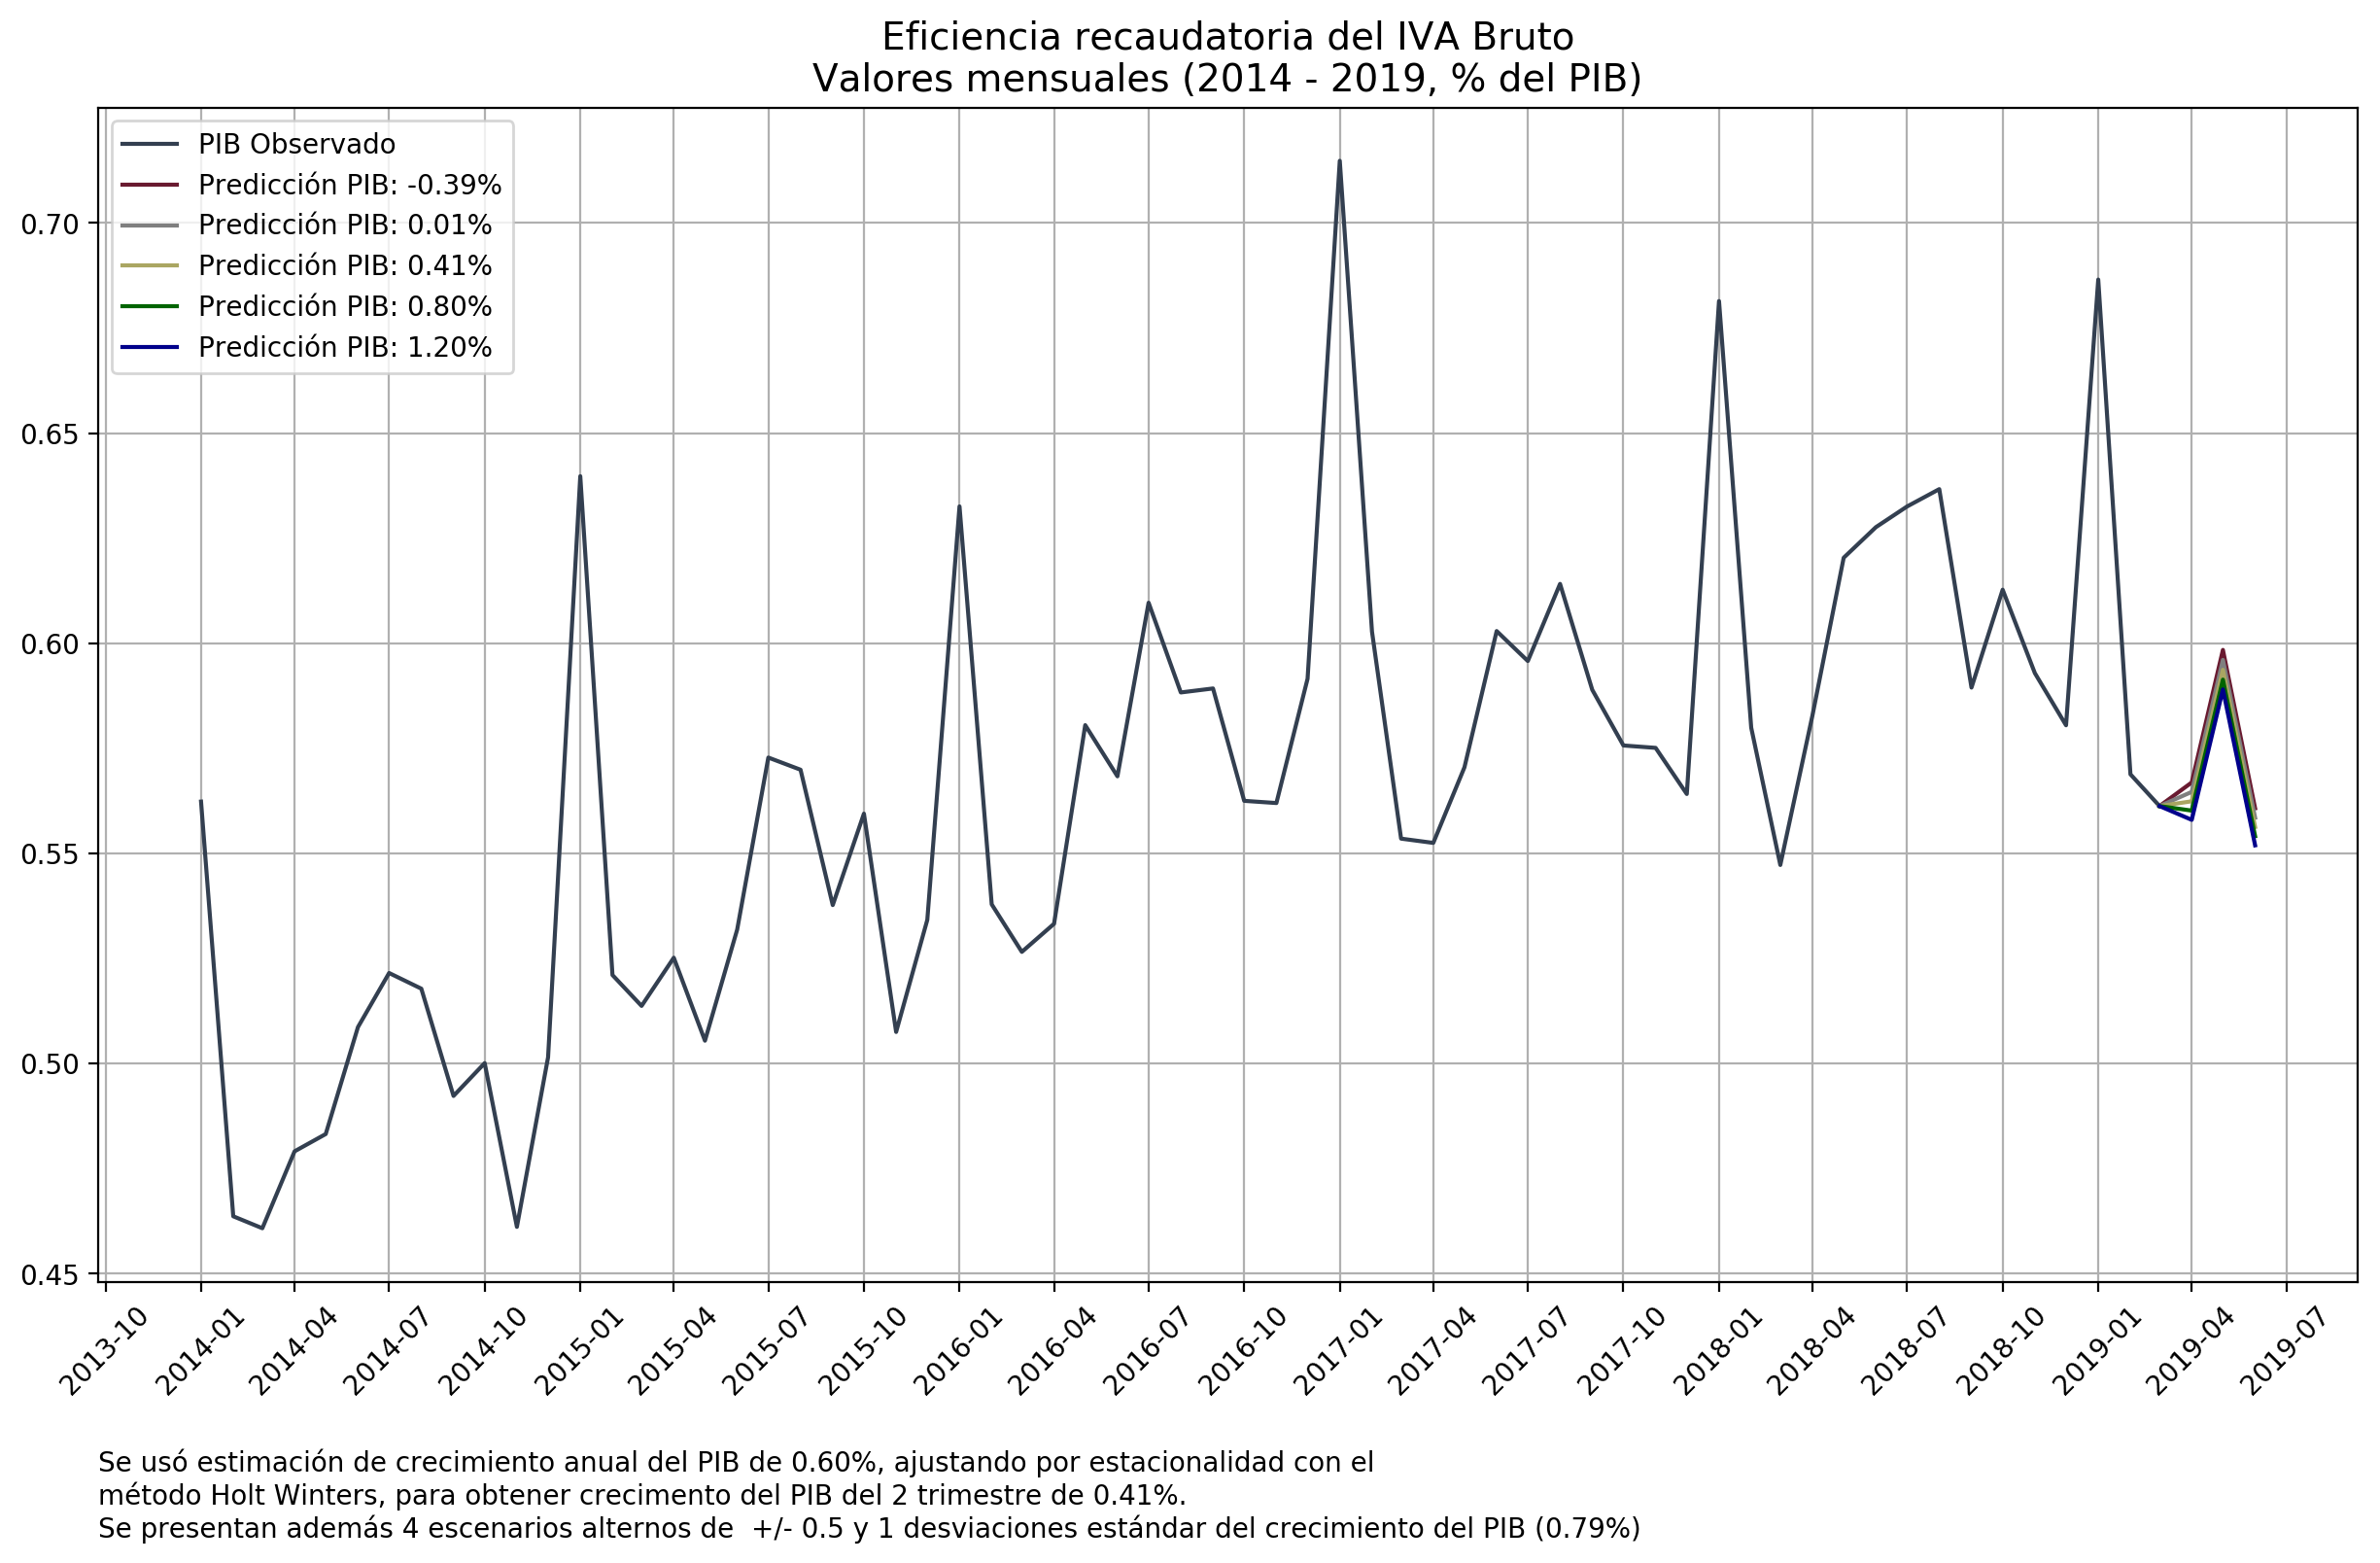

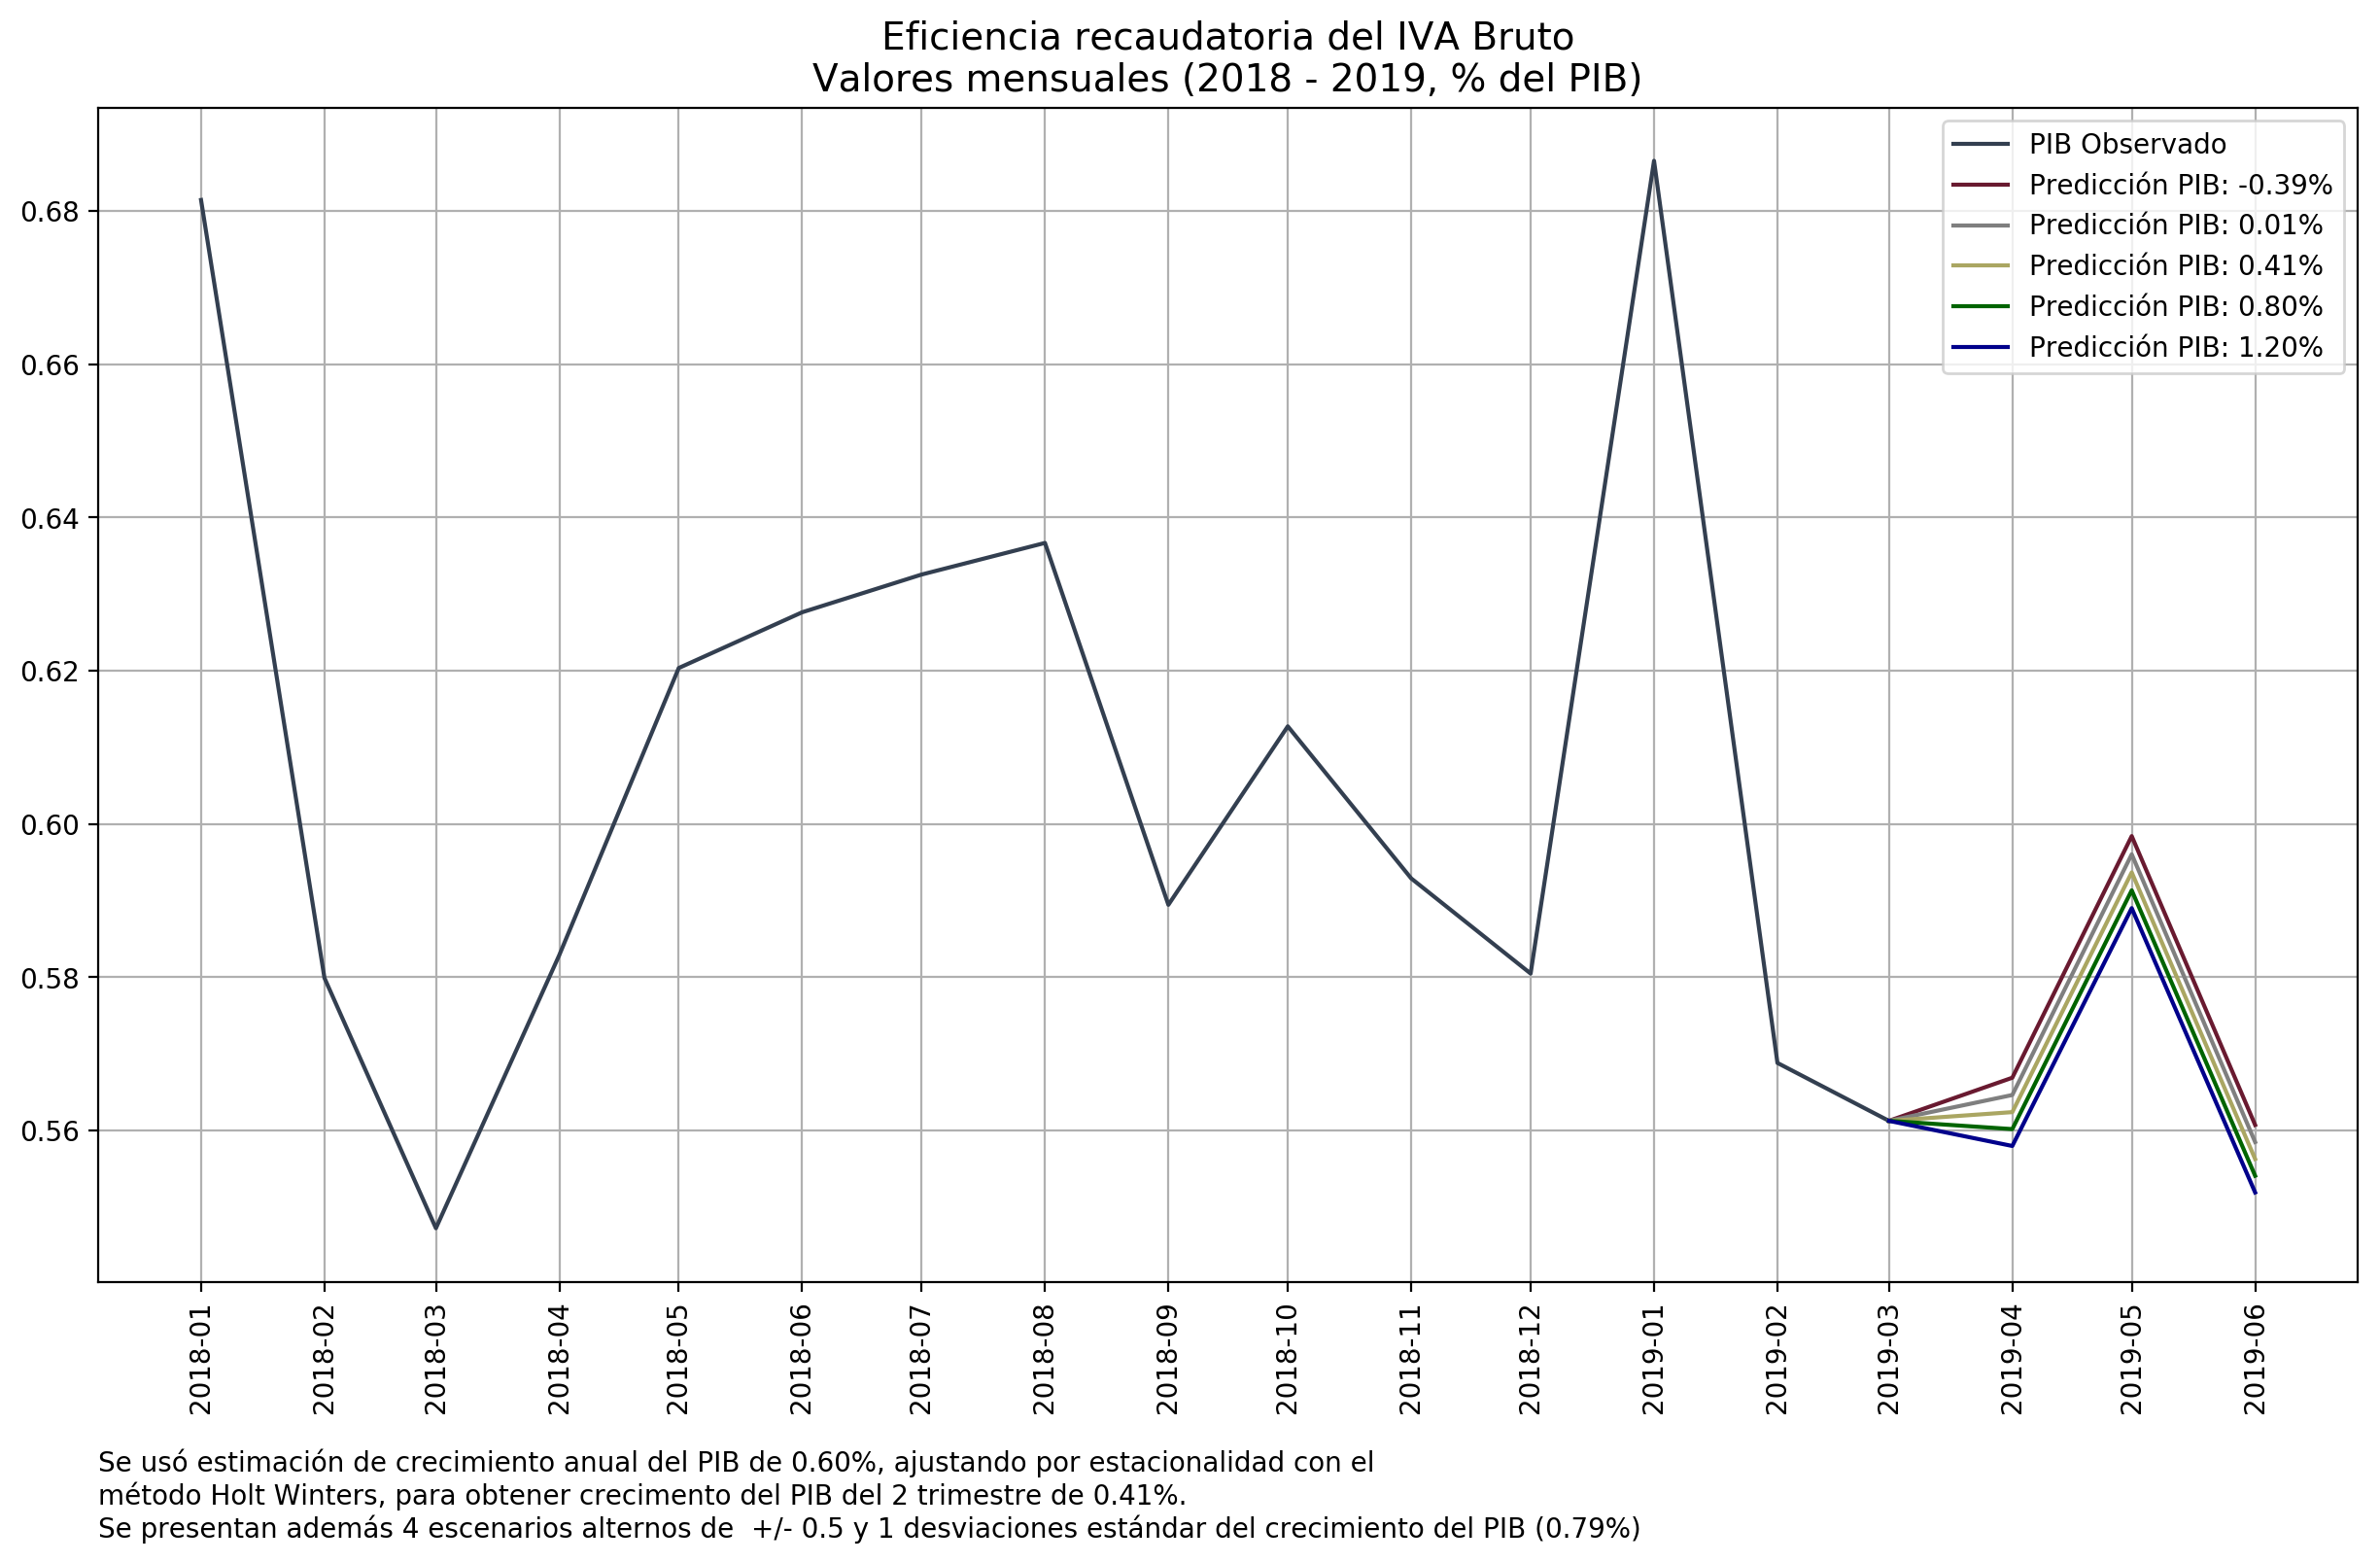

In [46]:
# Hacemos graficas para IVA
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores mensuales (2014 - 2019, % del PIB)', ticks='quarterly', 
#                         save_to='../figures/eficiencia_iva_bruto_mens_2014-01-01.png',
                        dpi=200,
                        footnote=footnote)
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores mensuales (2018 - 2019, % del PIB)', 
                        ticks='monthly',
                        min_date='2018-01-01',
#                         save_to='../figures/eficiencia_iva_bruto_mens_2018-01-01.png',
                        dpi=200,
                        footnote=footnote)

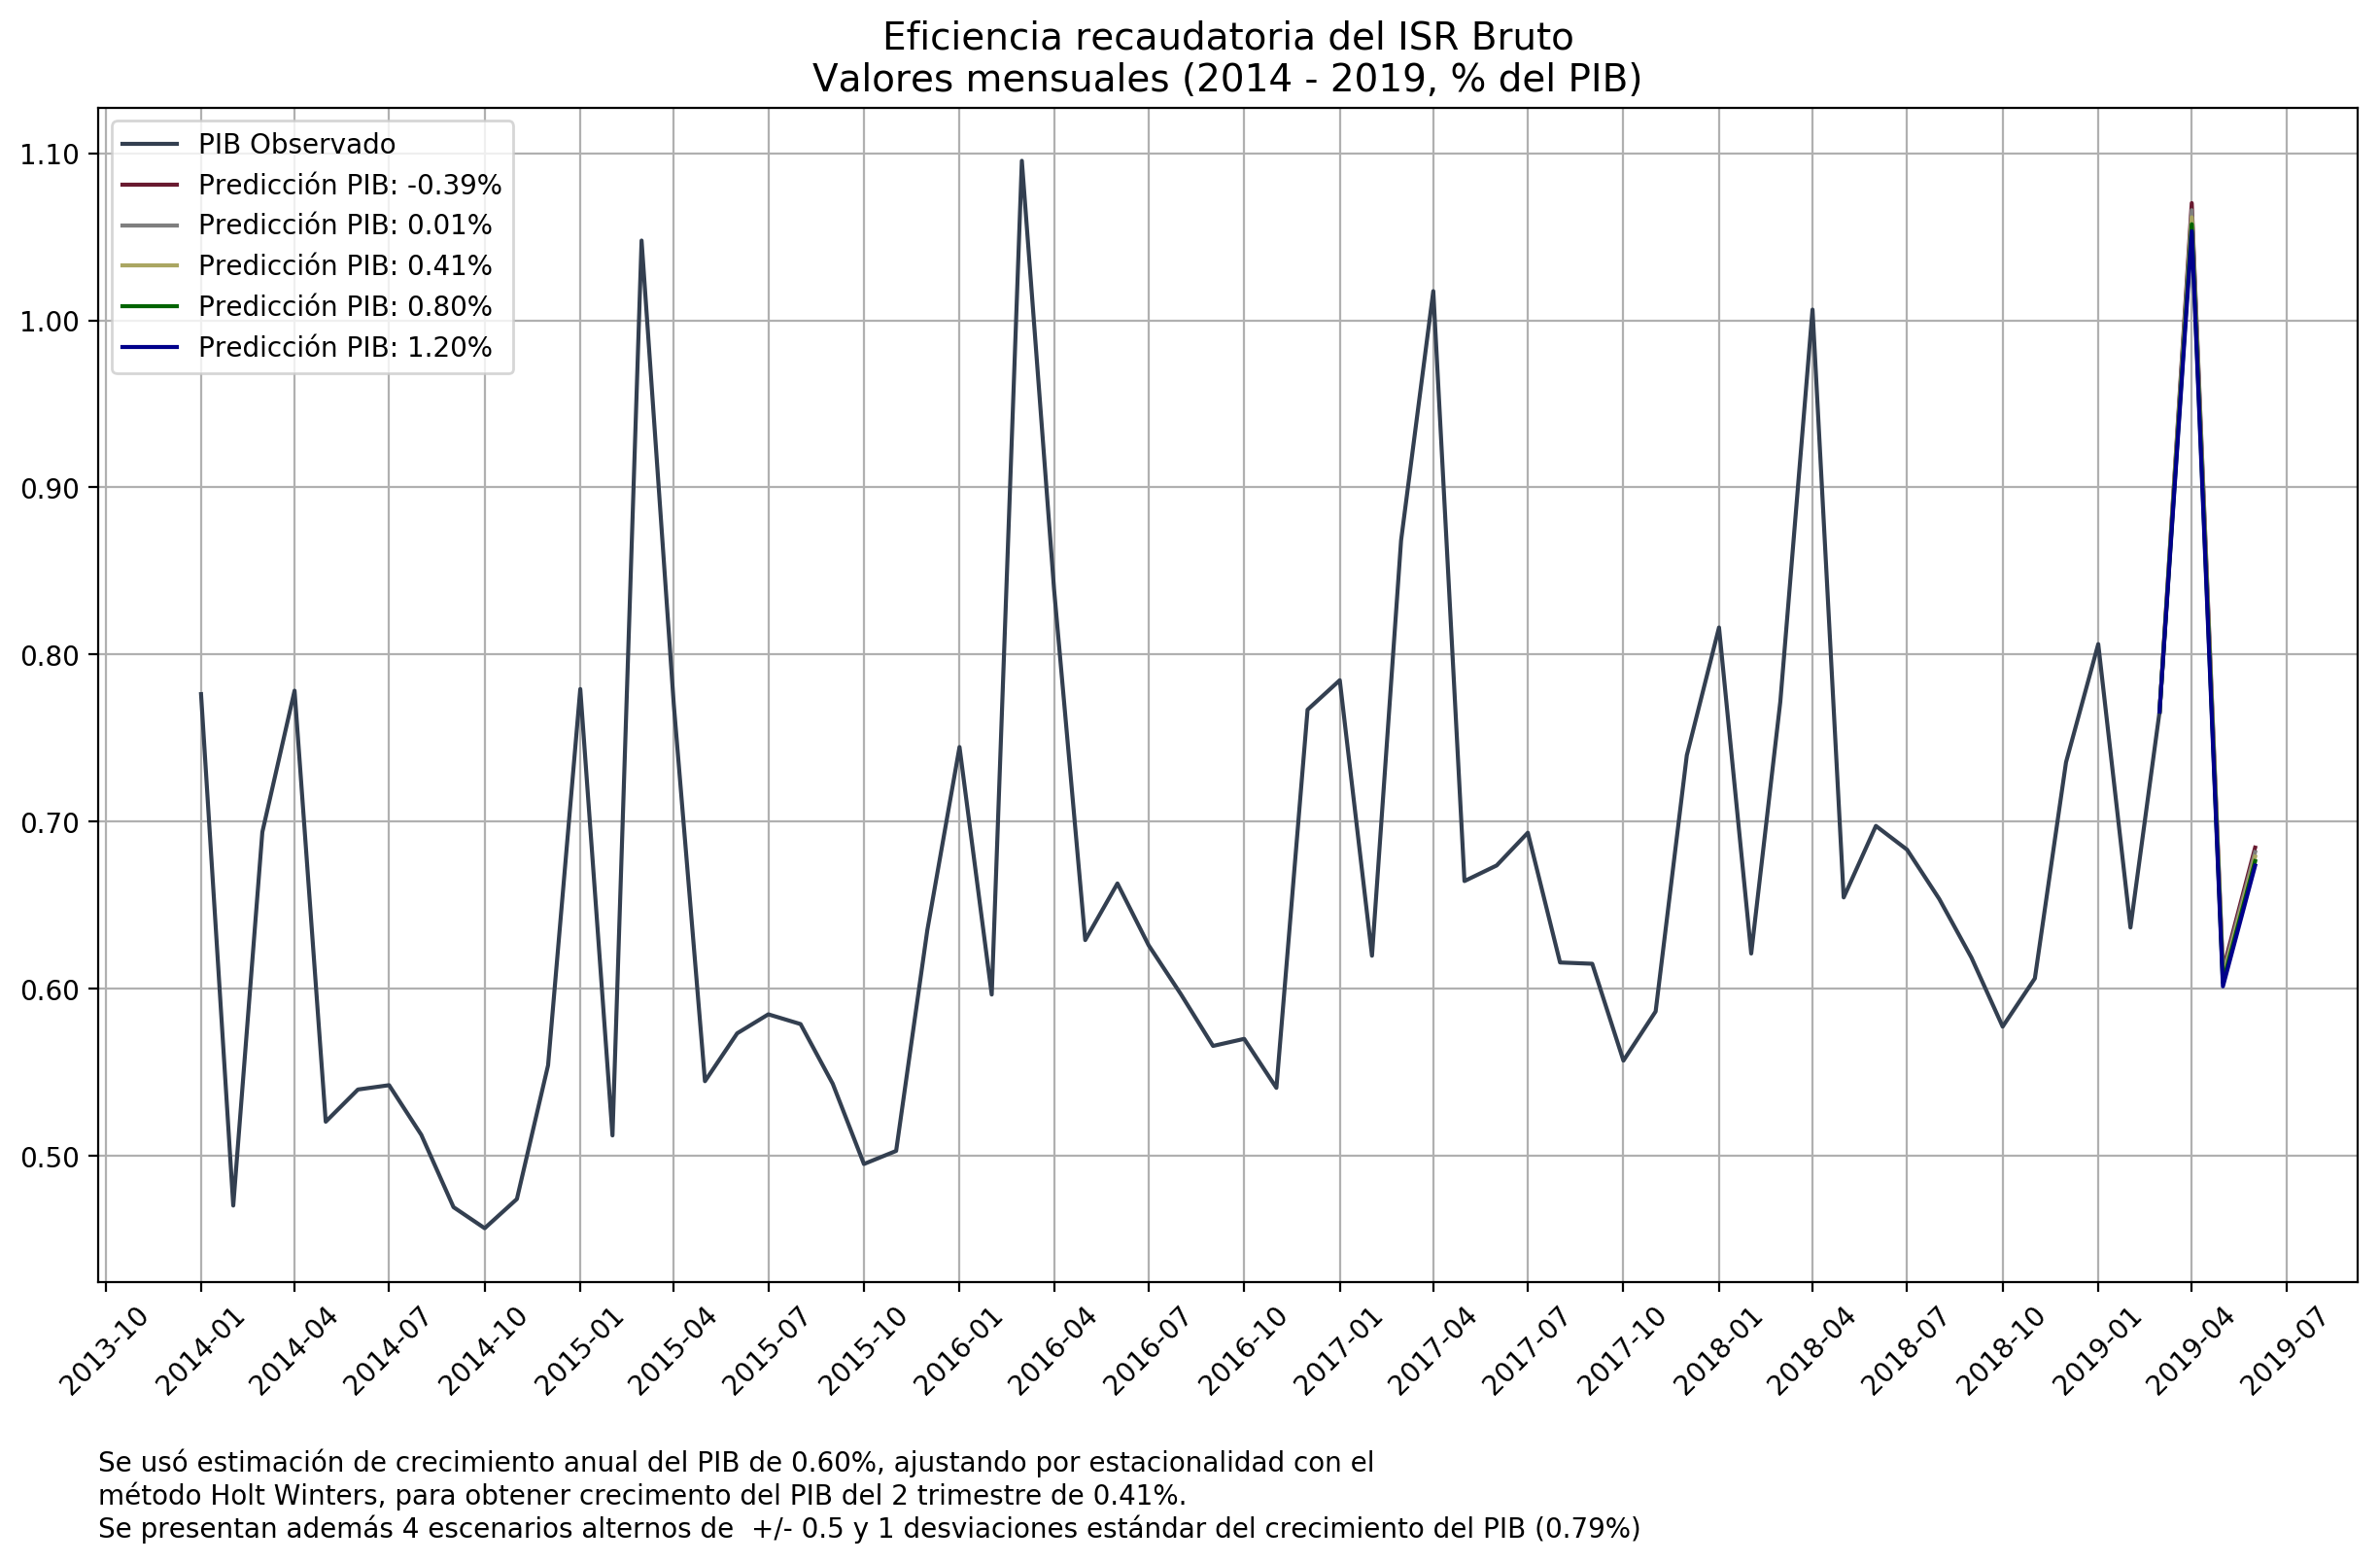

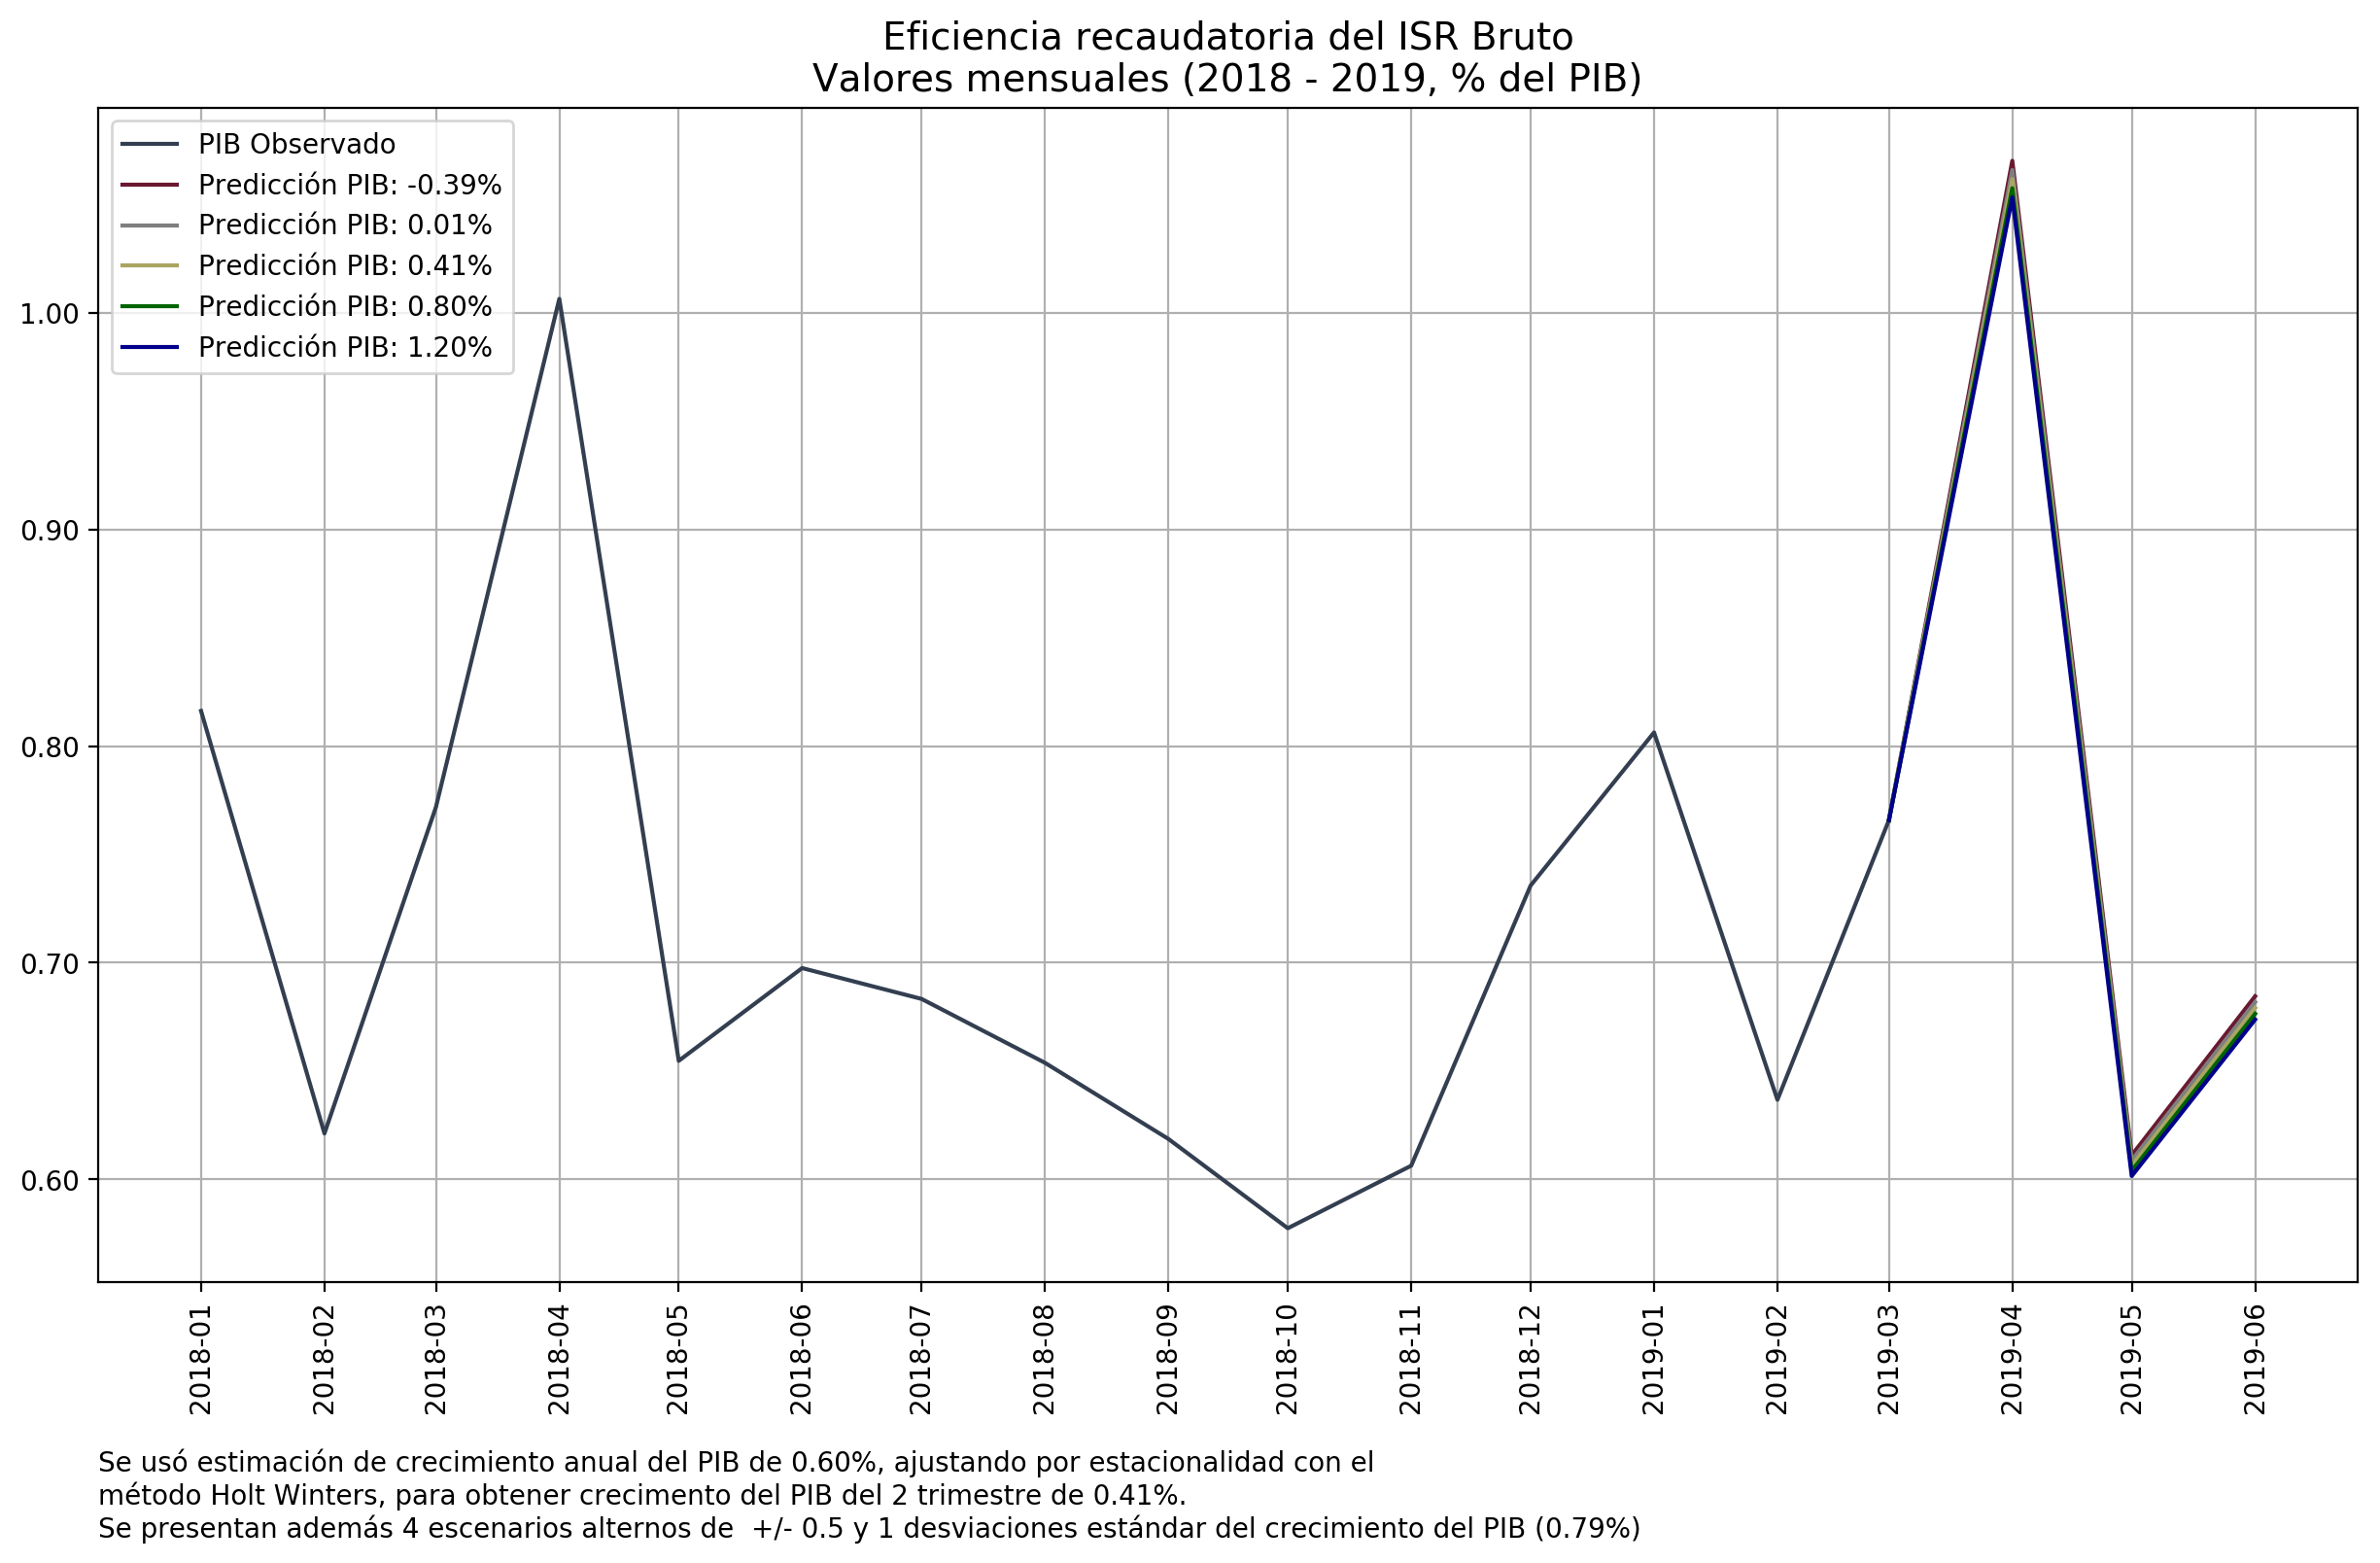

In [47]:
# HAcemos graficas para ISR

descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores mensuales (2014 - 2019, % del PIB)', ticks='quarterly', 
#                         save_to='../figures/eficiencia_isr_bruto_mens_2014-01-01.png',
                        dpi=200,
                        footnote=footnote)
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores mensuales (2018 - 2019, % del PIB)', 
                        ticks='monthly',
                        min_date='2018-01-01',
#                         save_to='../figures/eficiencia_isr_bruto_mens_2018-01-01.png',
                        dpi=200,
                        footnote=footnote)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [48]:
# Calculamos diferencias en eficiencia
cambio_eficiencia_df = eficiencia_df.diff(12)

In [49]:
# De nuevo, creamos un DF especifico para plot
cambio_eficiencia_df_to_plot = cambio_eficiencia_df.copy()
# Reemplazamos por NaN las variables que estan en la lista prediction vars (La lista se creó antes)
last_month_not_na = months_to_predict_pib[0] - relativedelta(months=2)
cambio_eficiencia_df_to_plot.loc[pd.date_range('2014-01-01', last_month_not_na, freq='MS'), prediction_vars] = np.nan


# Para los labels, seguiremos un procedimiento simiar al anterior
graph_change_labels = ['PIB Observado']
graph_change_labels += ['Predicción PIB: {0:.2f}%'.format(g) for g in growth_rates]

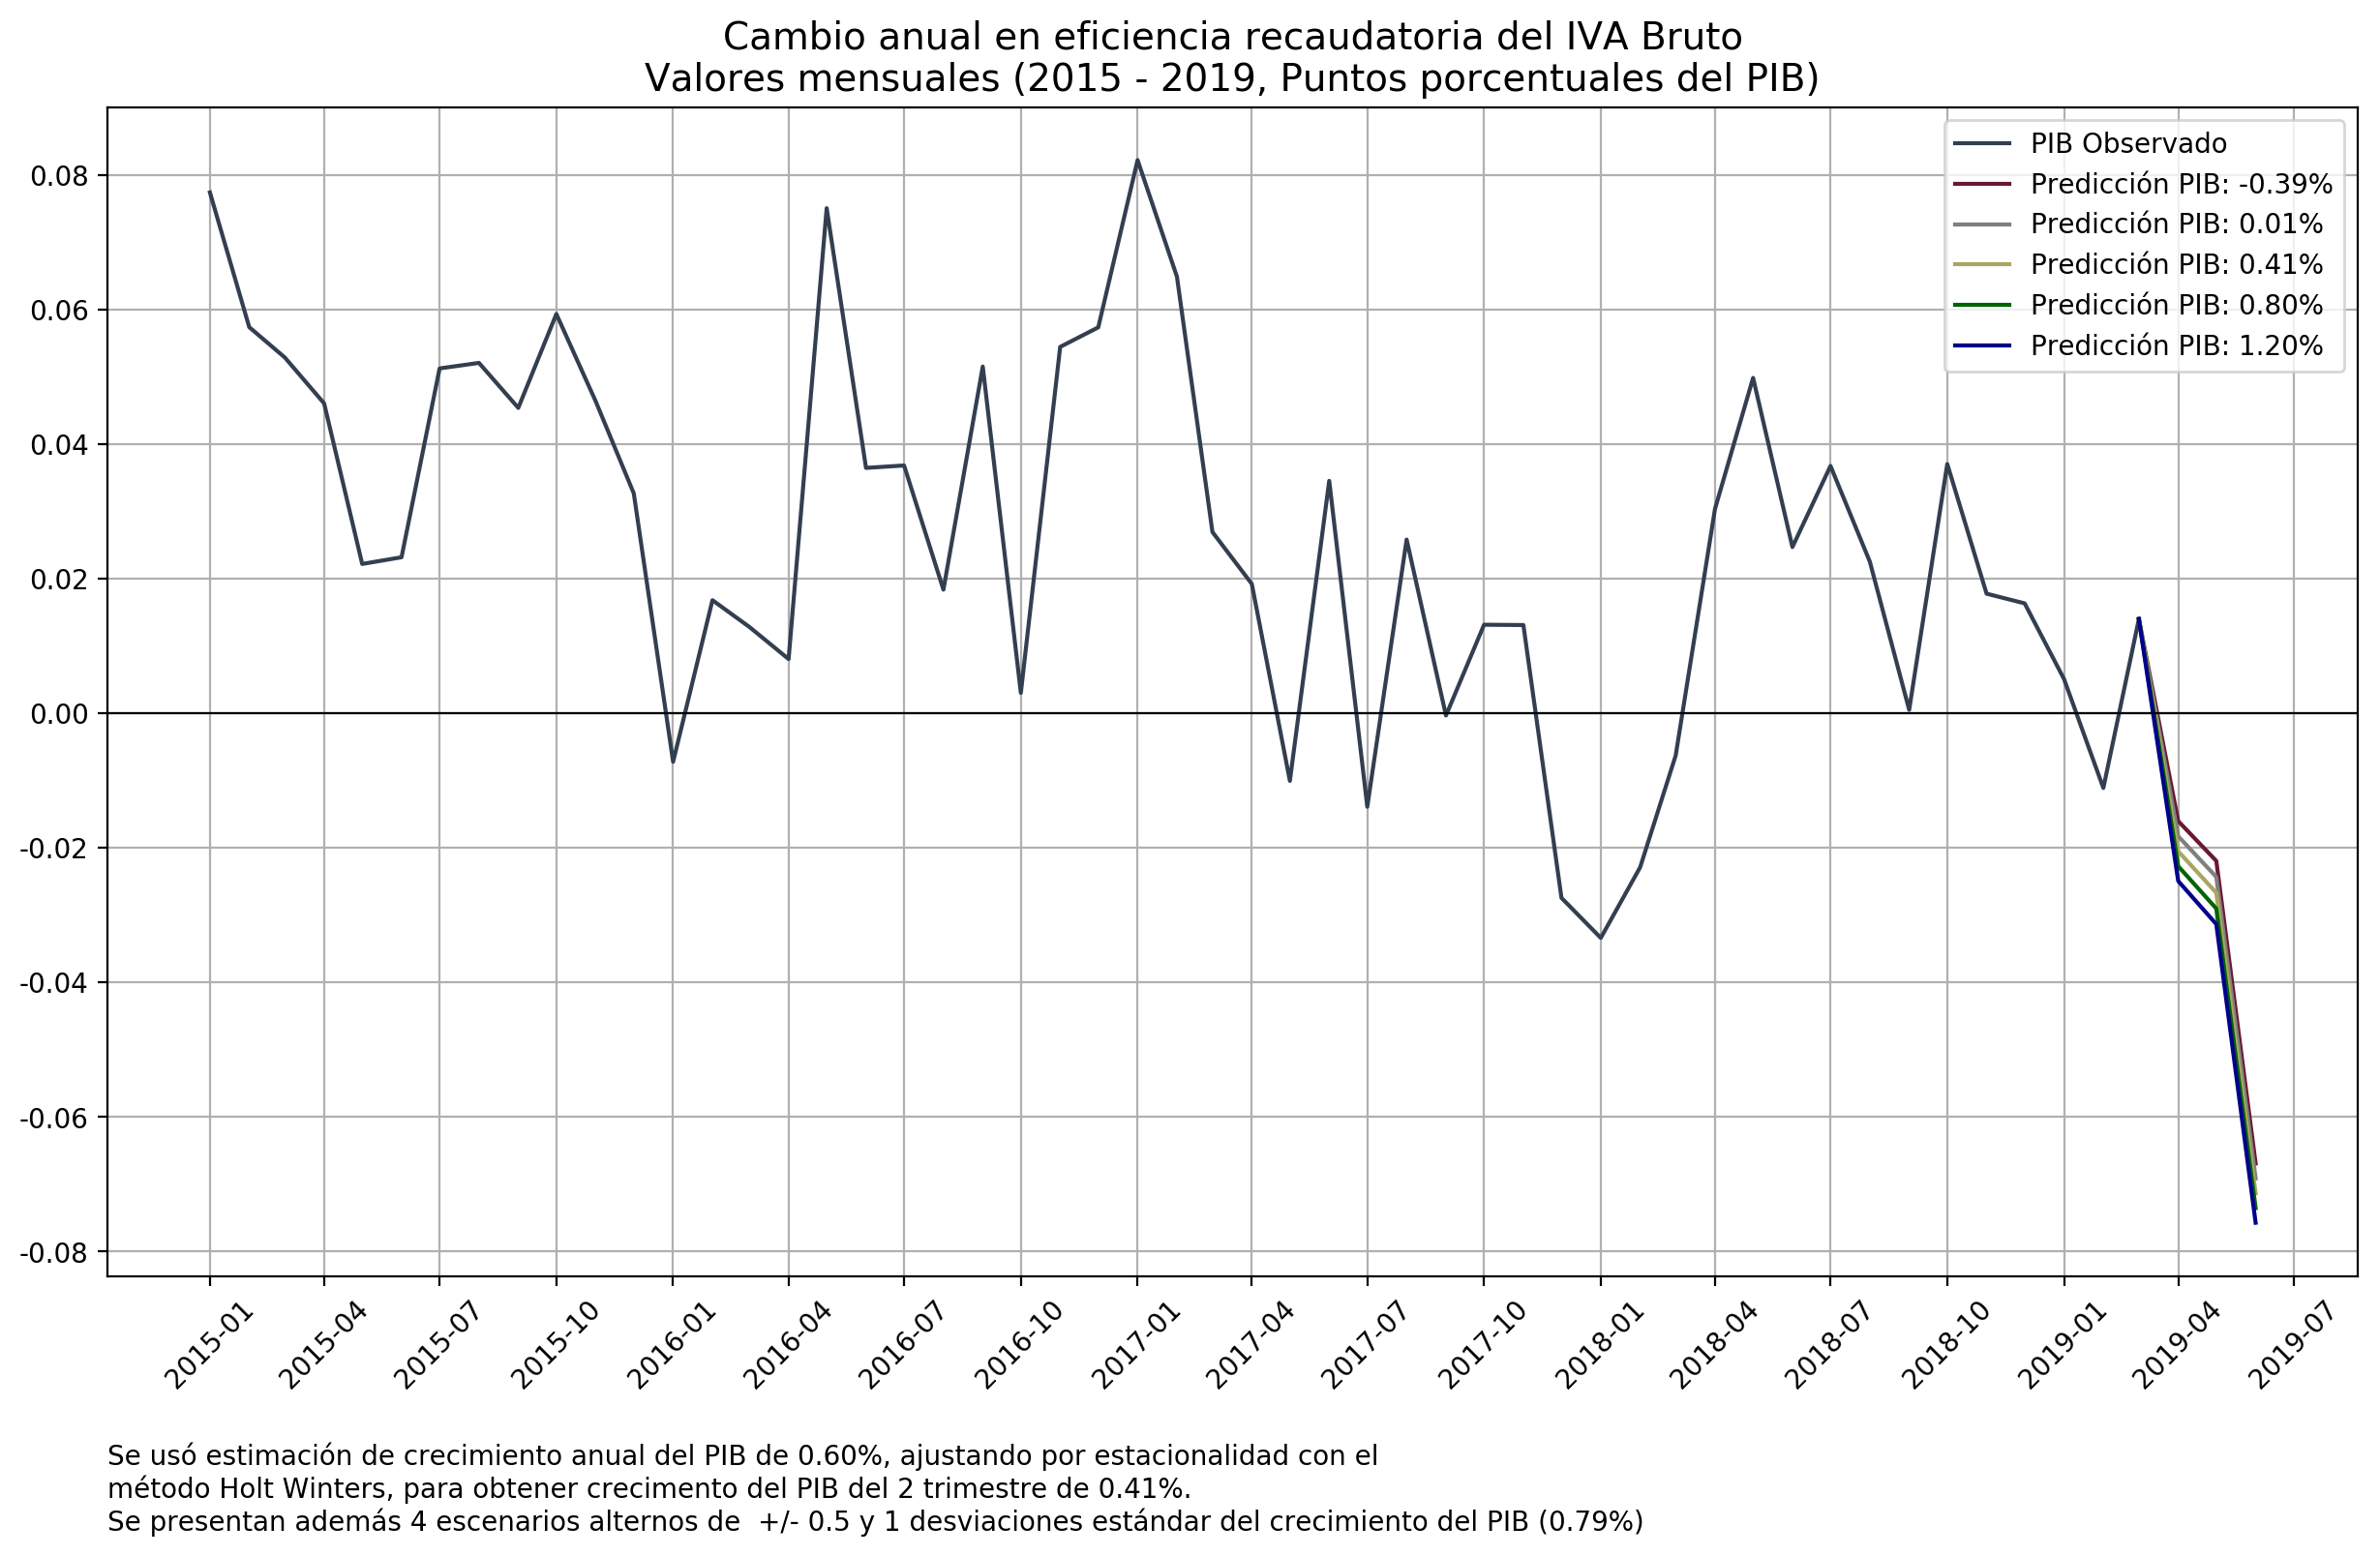

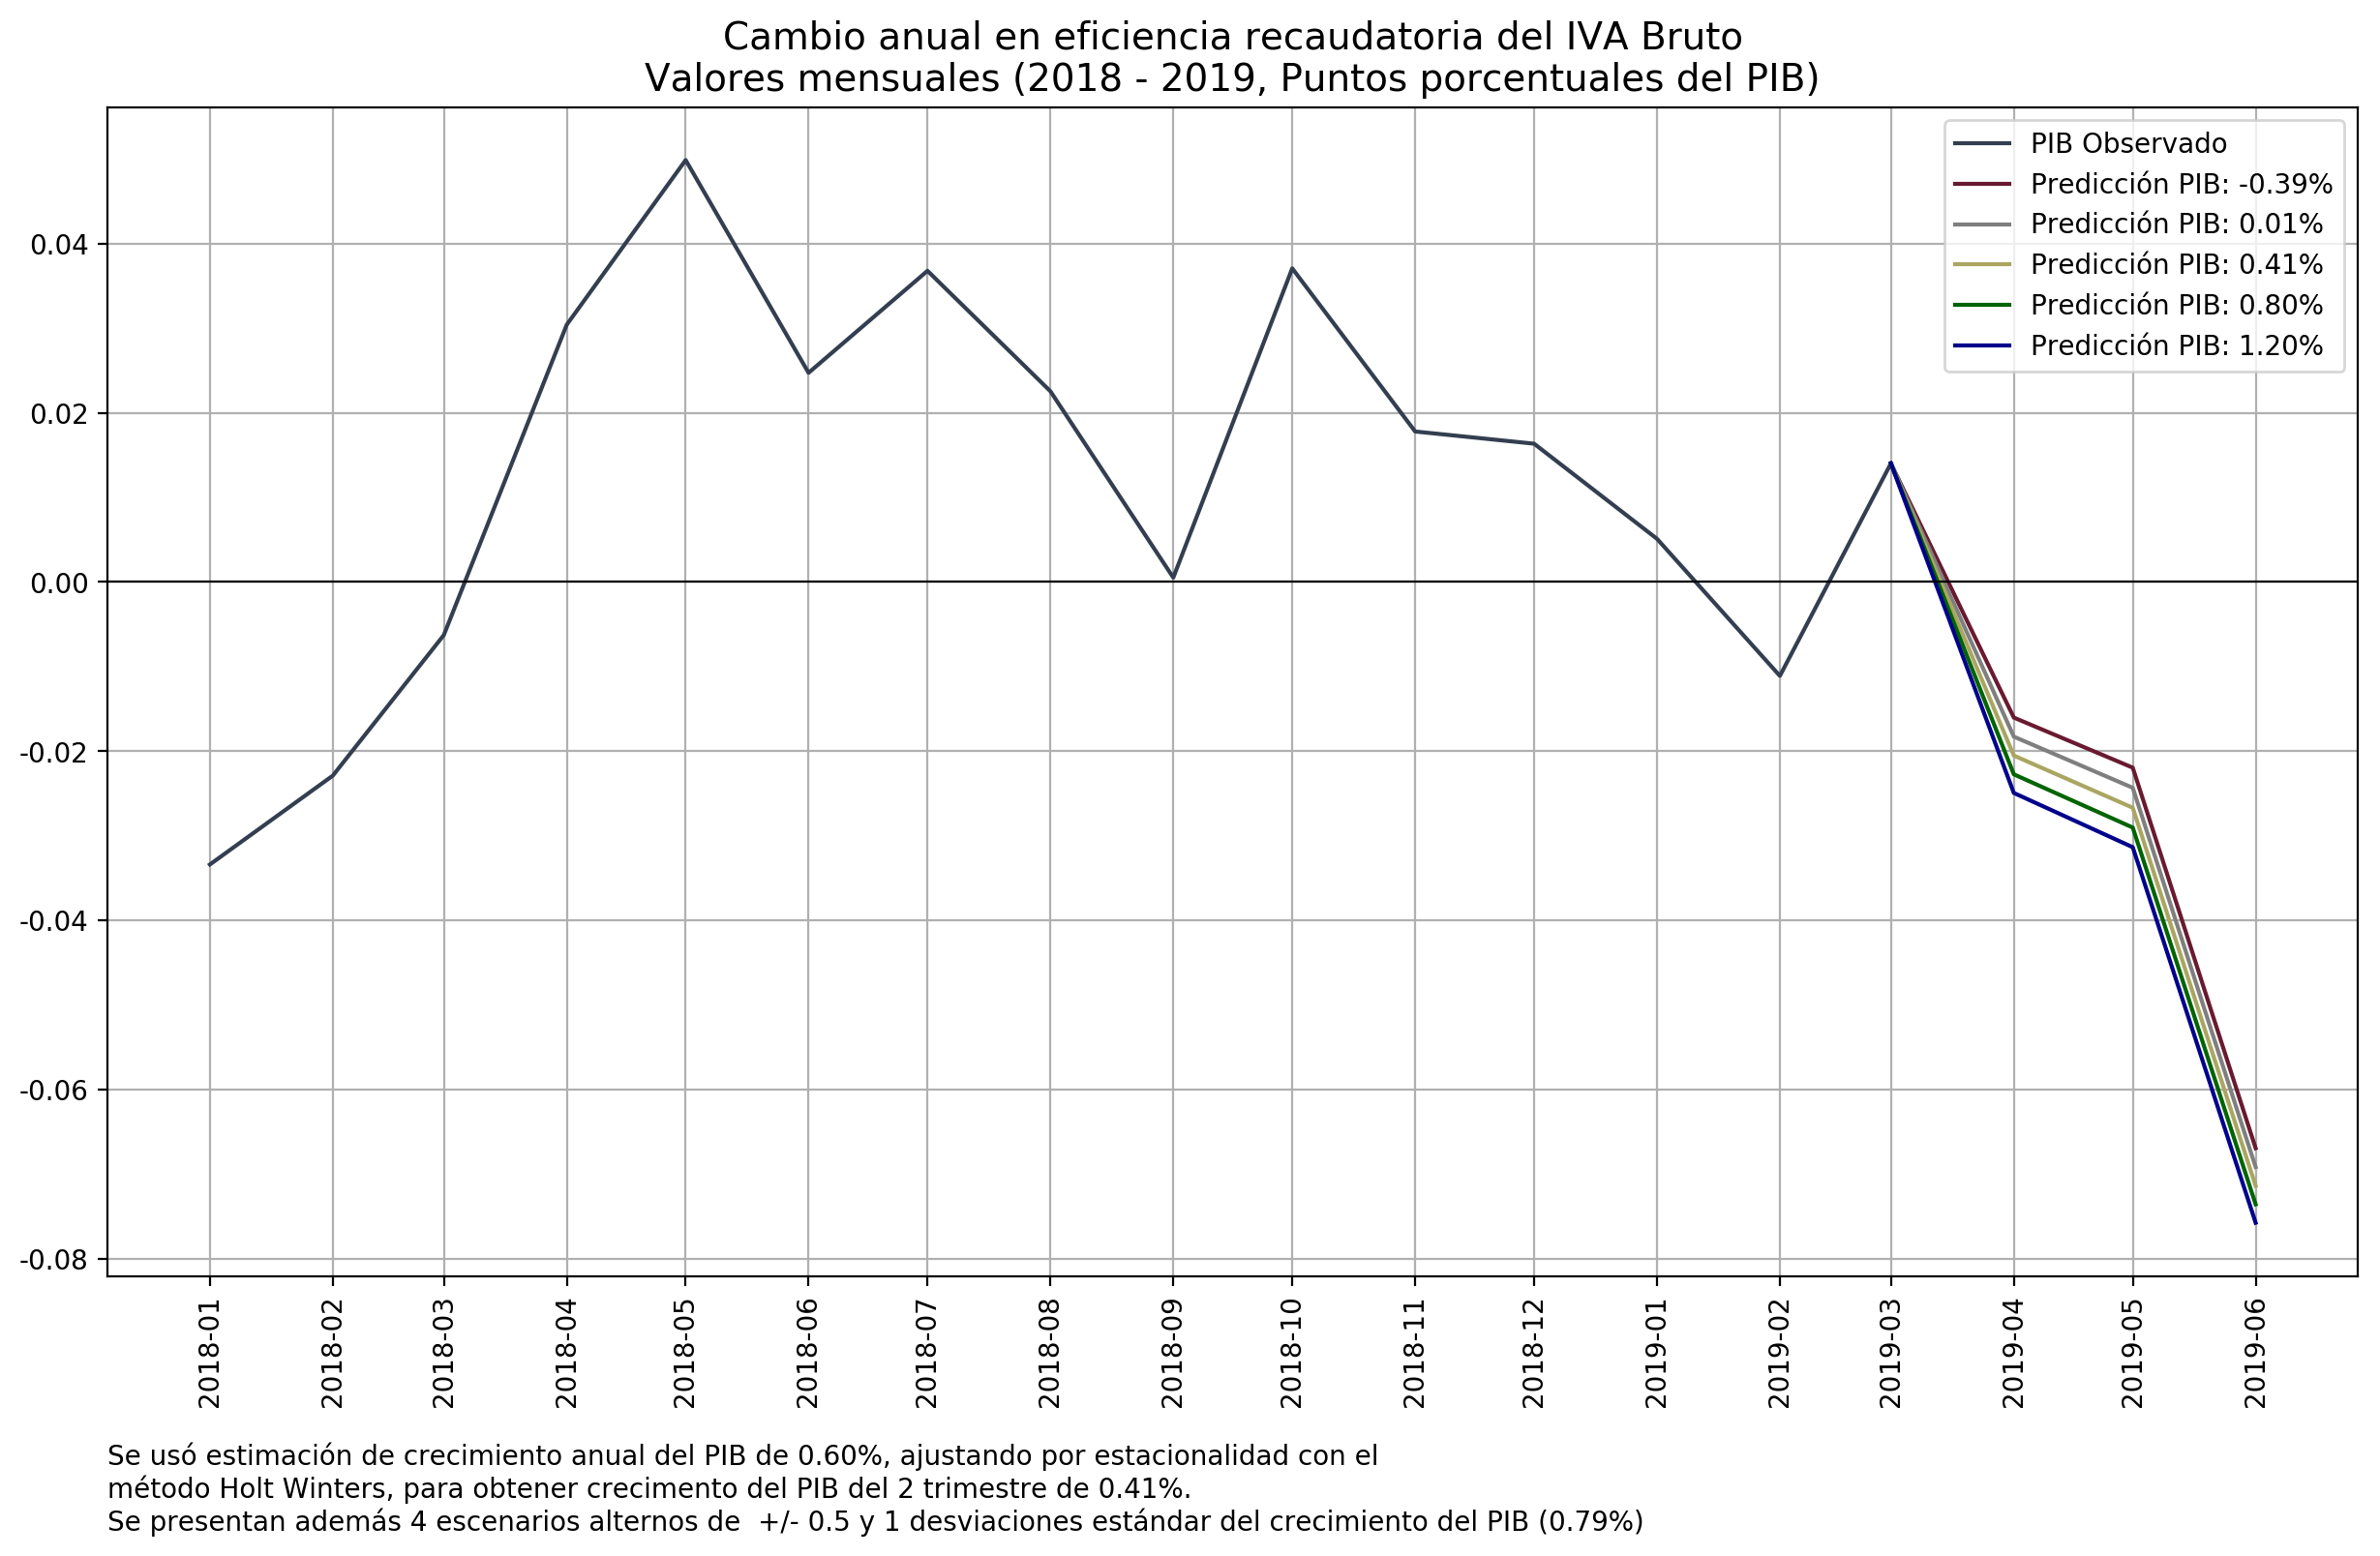

In [50]:
# Hacemos graficas para IVA
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores mensuales (2015 - 2019, Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        dpi=200,
#                         save_to='../figures/cambio_eficiencia_iva_bruto_mens_2014-01-01.png',
                        footnote=footnote)

descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores mensuales (2018 - 2019, Puntos porcentuales del PIB)', ticks='monthly',
                        hline=0,
                        min_date='2018-01-01',
                        dpi=200,
#                         save_to='../figures/cambio_eficiencia_iva_bruto_mens_2018-01-01.png',
                        footnote=footnote)

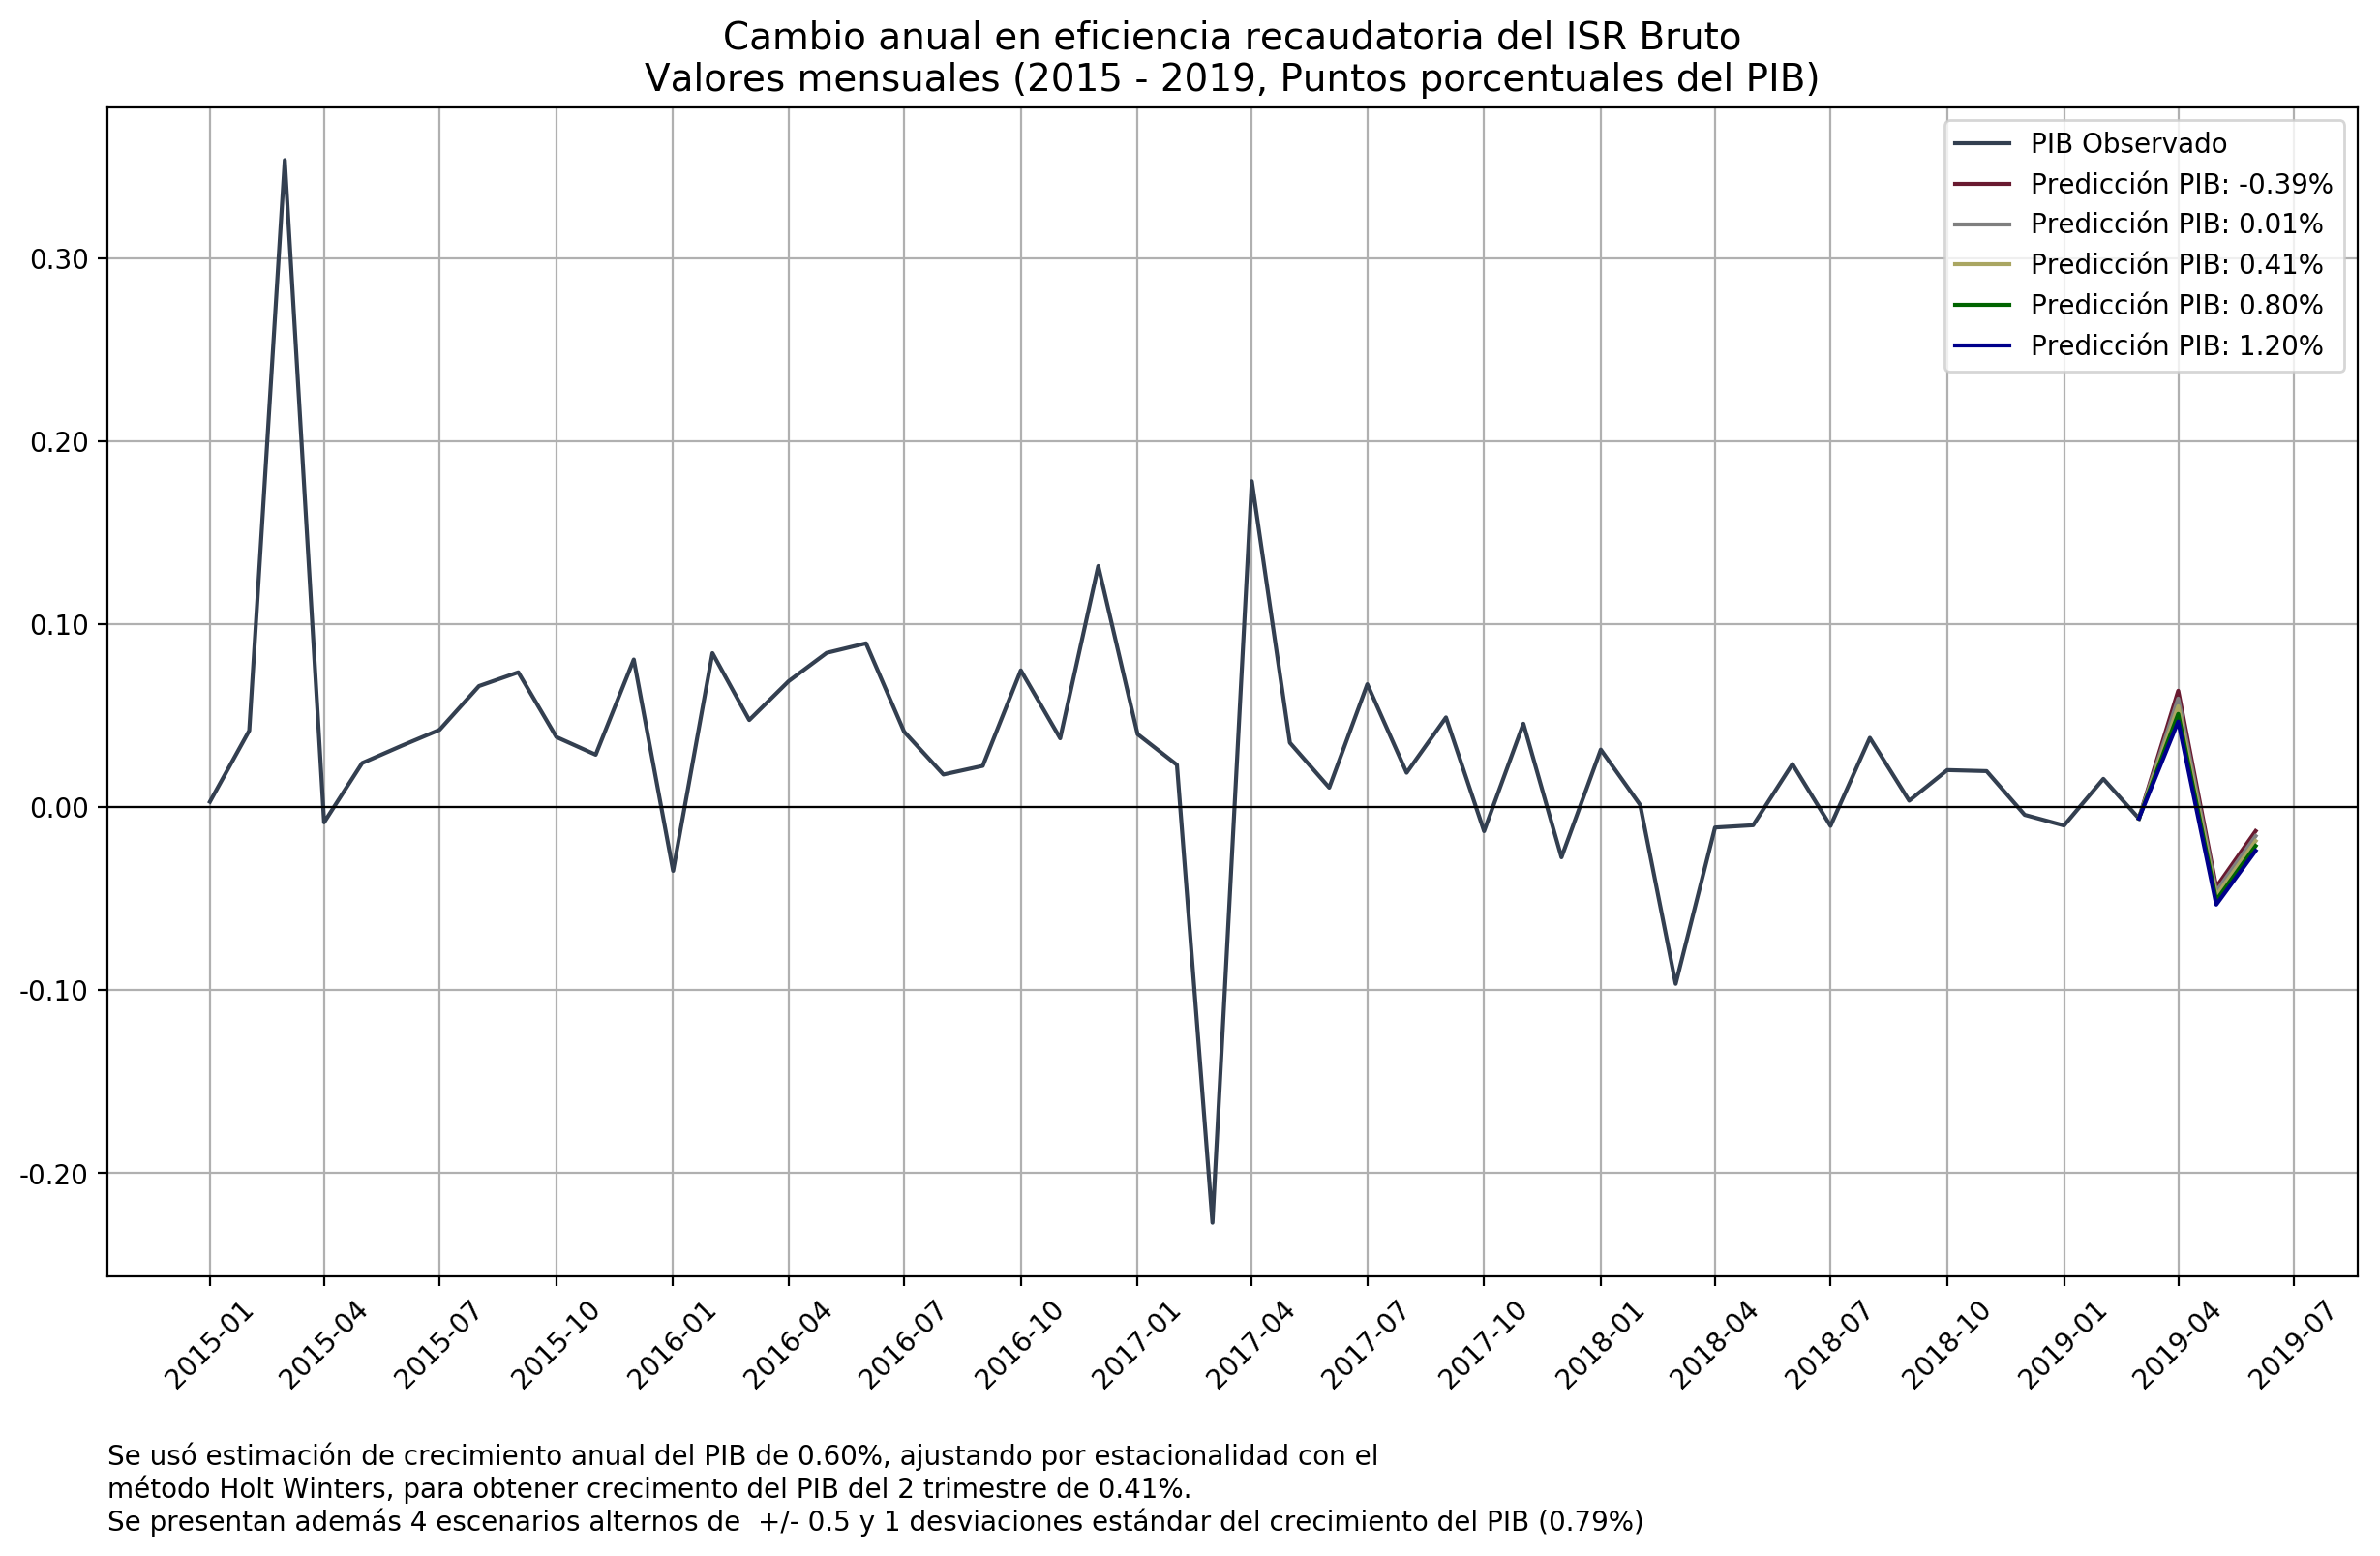

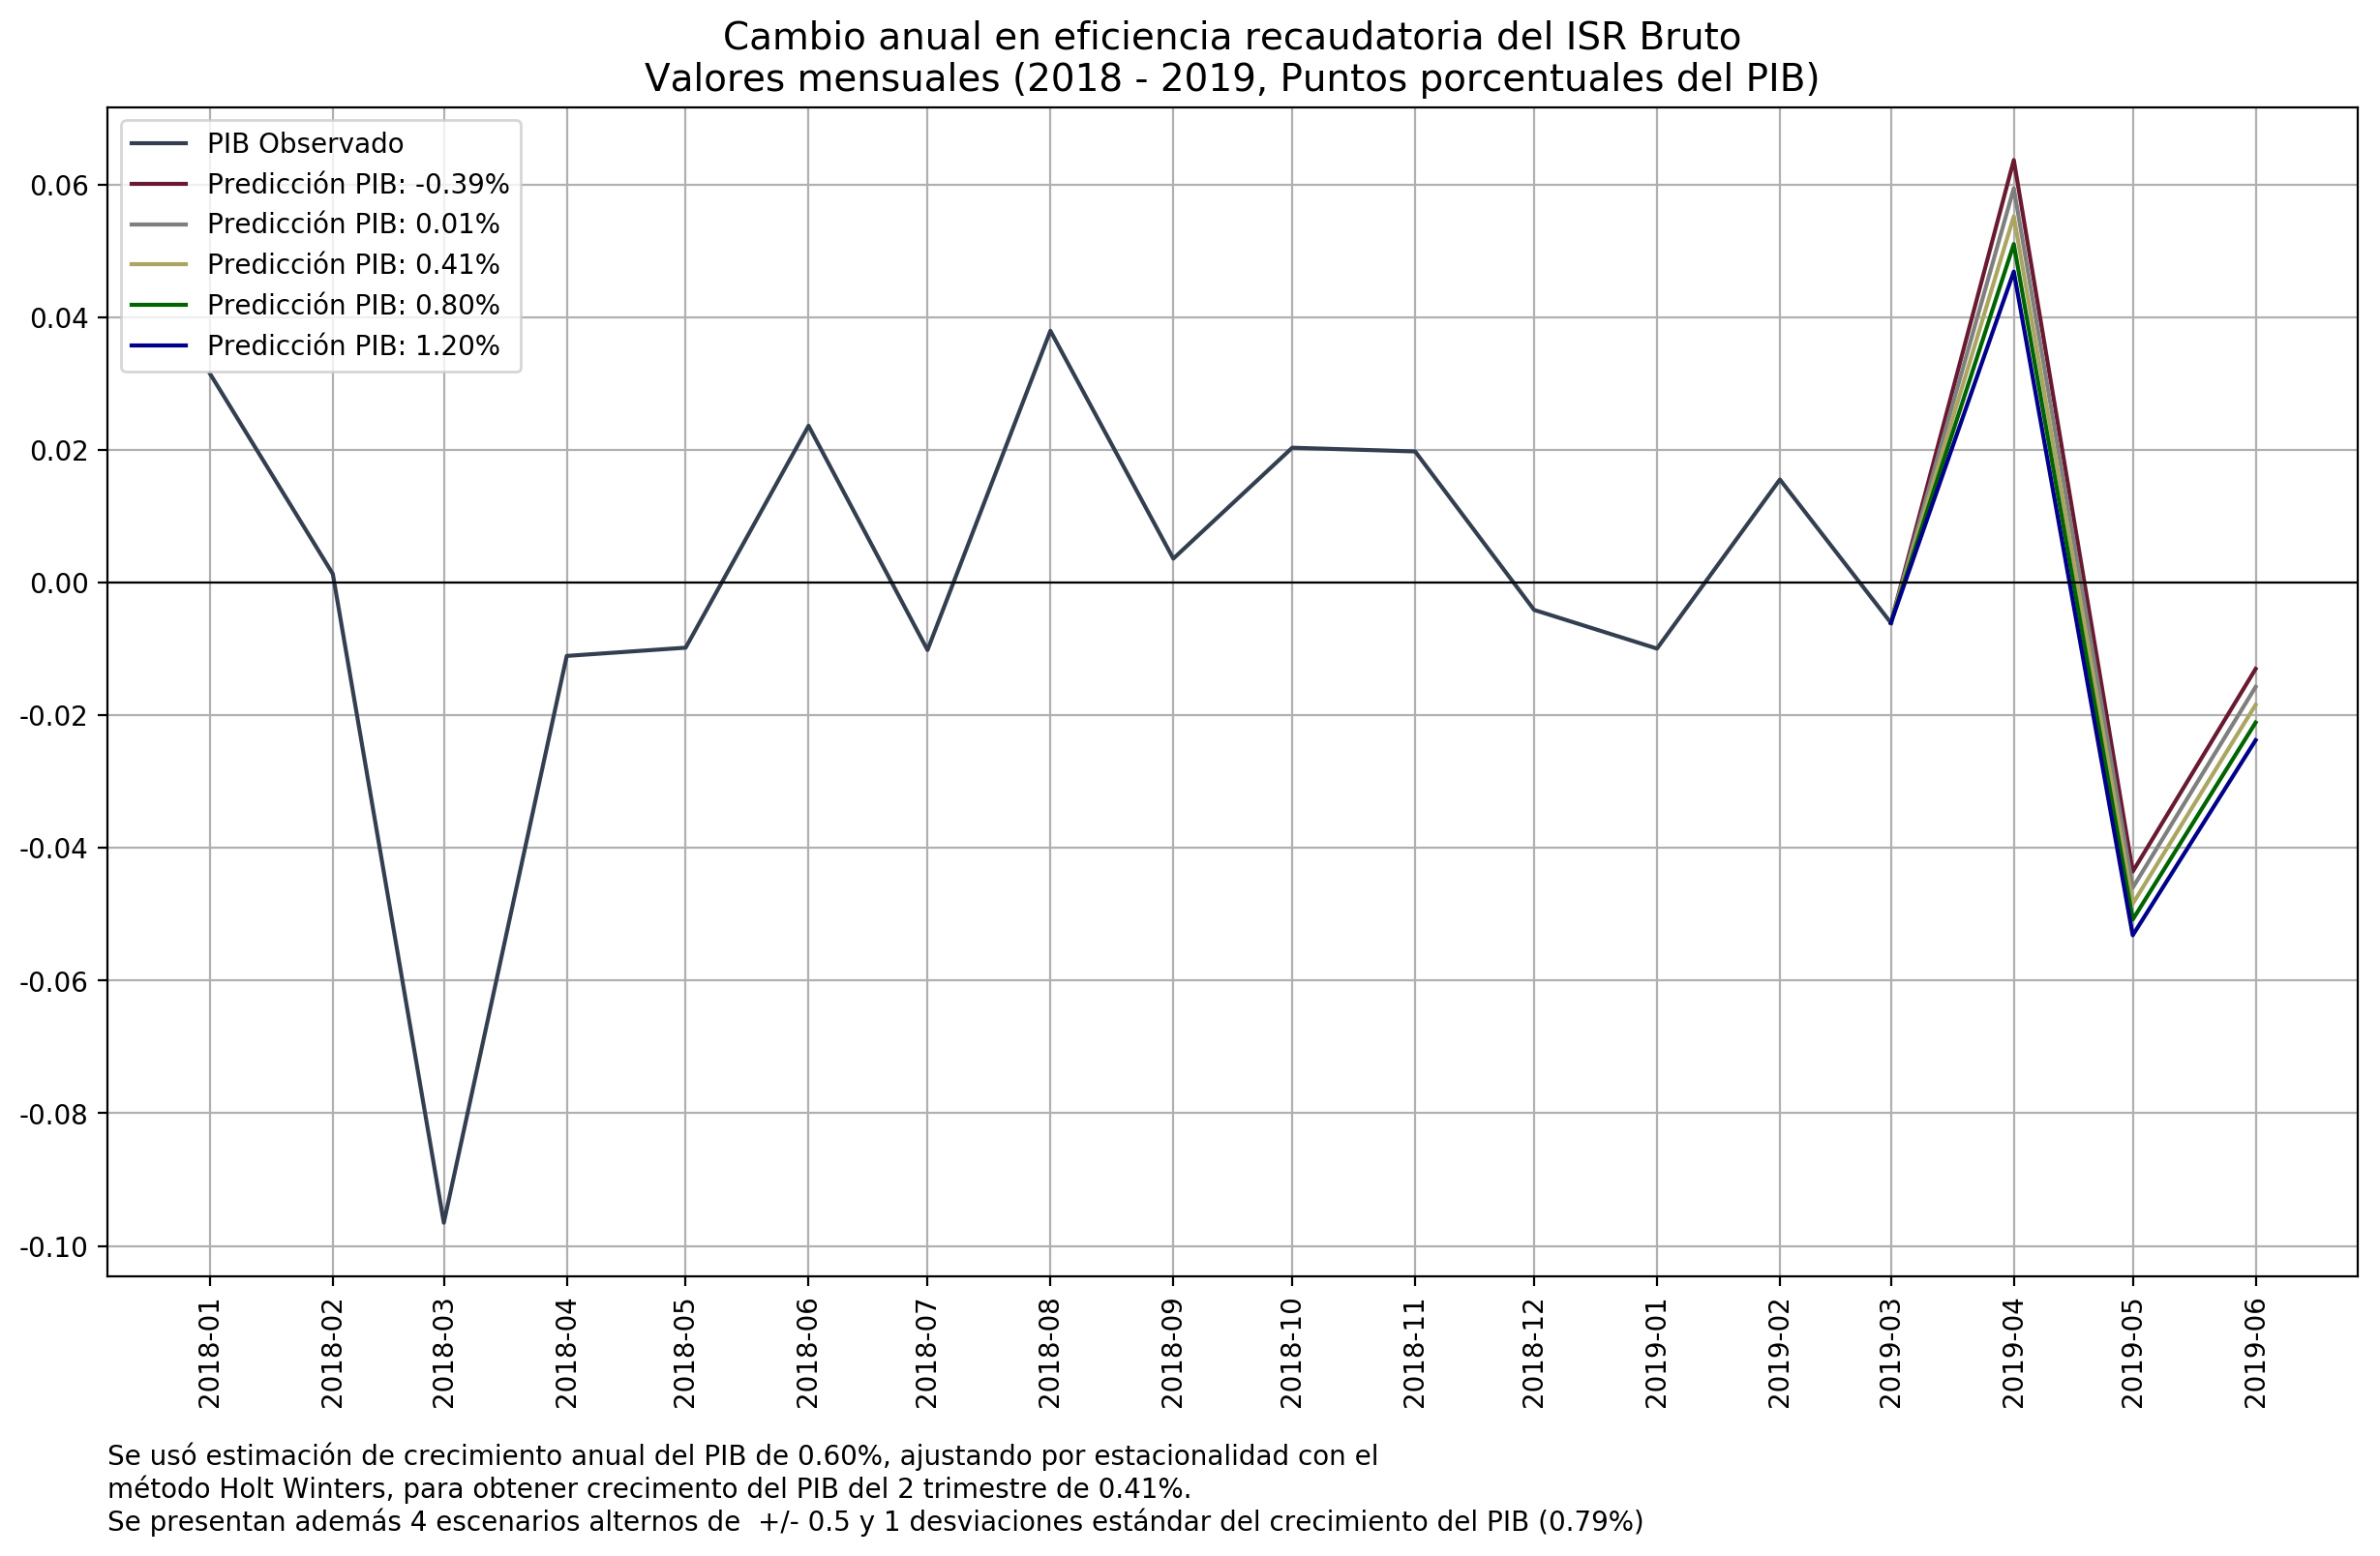

In [51]:
# HAcemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores mensuales (2015 - 2019, Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        dpi=200,
#                         save_to='../figures/cambio_eficiencia_isr_bruto_mens_2014-01-01.png',
                        footnote=footnote)

descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores mensuales (2018 - 2019, Puntos porcentuales del PIB)', ticks='monthly',
                        hline=0,
                        min_date='2018-01-01',
                        dpi=200,
#                         save_to='../figures/cambio_eficiencia_isr_bruto_mens_2018-01-01.png',
                        footnote=footnote)

### Elasticidad ultimo periodo

In [46]:
growth_rates

[-0.1058355218736943,
 0.2916044818240772,
 0.6890444855218488,
 1.0864844892196204,
 1.483924492917392]

In [47]:
crecimiento_rec = ingresos_totales.pct_change(12)
crecimiento_rec = crecimiento_rec.add_prefix('Crec_perc_')

In [48]:
## TABLA IVA

tabla_elast_iva = crecimiento_rec.loc[months_to_predict_pib,\
                    ['Crec_perc_iva_bruto_(mdp)_r']] * 100
for growth in growth_rates:
    tabla_elast_iva['Elasticidad (Crecimiento PIB : {:.2f}%)'.format(growth)] =\
        tabla_elast_iva['Crec_perc_iva_bruto_(mdp)_r'] / growth
tabla_elast_iva.rename(columns = {'Crec_perc_iva_bruto_(mdp)_r': 'Crecimiento % del IVA'},
                       inplace=True)
display(tabla_elast_iva.applymap(lambda x: '{:.2f}'.format(x)))

## TABLA ISR
tabla_elast_isr = crecimiento_rec.loc[months_to_predict_pib,\
                    ['Crec_perc_isr_bruto_(mdp)_r']] * 100
for growth in growth_rates:
    tabla_elast_isr['Elasticidad (Crecimiento PIB : {:.2f}%)'.format(growth)] =\
        tabla_elast_isr['Crec_perc_isr_bruto_(mdp)_r'] / growth
tabla_elast_isr.rename(columns = {'Crec_perc_isr_bruto_(mdp)_r': 'Crecimiento % del ISR'},
                       inplace=True)
display(tabla_elast_isr.applymap(lambda x: '{:.2f}'.format(x)))

Crecimiento % del IVA Elasticidad (Crecimiento PIB : -0.11%)  \
fecha                                                                     
2019-04-01                 -3.12                                  29.53   
2019-05-01                 -3.91                                  36.94   
2019-06-01                -11.01                                 103.99   

           Elasticidad (Crecimiento PIB : 0.29%)  \
fecha                                              
2019-04-01                                -10.72   
2019-05-01                                -13.41   
2019-06-01                                -37.74   

           Elasticidad (Crecimiento PIB : 0.69%)  \
fecha                                              
2019-04-01                                 -4.54   
2019-05-01                                 -5.67   
2019-06-01                                -15.97   

           Elasticidad (Crecimiento PIB : 1.09%)  \
fecha                                              
2019-04-01                                 -2.88   
2019-05-01                                 -3.60   
2019-06-01                                -10.13   

           Elasticidad (Crecimiento PIB : 1.48%)  
fecha                                             
2019-04-01                                 -2.11  
2019-05-01                                 -2.63  
2019-06-01                                 -7.42

Crecimiento % del ISR Elasticidad (Crecimiento PIB : -0.11%)  \
fecha                                                                     
2019-04-01                  5.92                                 -55.93   
2019-05-01                 -7.02                                  66.28   
2019-06-01                 -2.24                                  21.19   

           Elasticidad (Crecimiento PIB : 0.29%)  \
fecha                                              
2019-04-01                                 20.30   
2019-05-01                                -24.06   
2019-06-01                                 -7.69   

           Elasticidad (Crecimiento PIB : 0.69%)  \
fecha                                              
2019-04-01                                  8.59   
2019-05-01                                -10.18   
2019-06-01                                 -3.26   

           Elasticidad (Crecimiento PIB : 1.09%)  \
fecha                                              
2019-04-01                                  5.45   
2019-05-01                                 -6.46   
2019-06-01                                 -2.06   

           Elasticidad (Crecimiento PIB : 1.48%)  
fecha                                             
2019-04-01                                  3.99  
2019-05-01                                 -4.73  
2019-06-01                                 -1.51

# Análisis trimestral

In [49]:
# # Regresamos el PIB a valores trimestrales
pib_r_df_predict_q = pib_r_df_predict.resample('QS').mean()

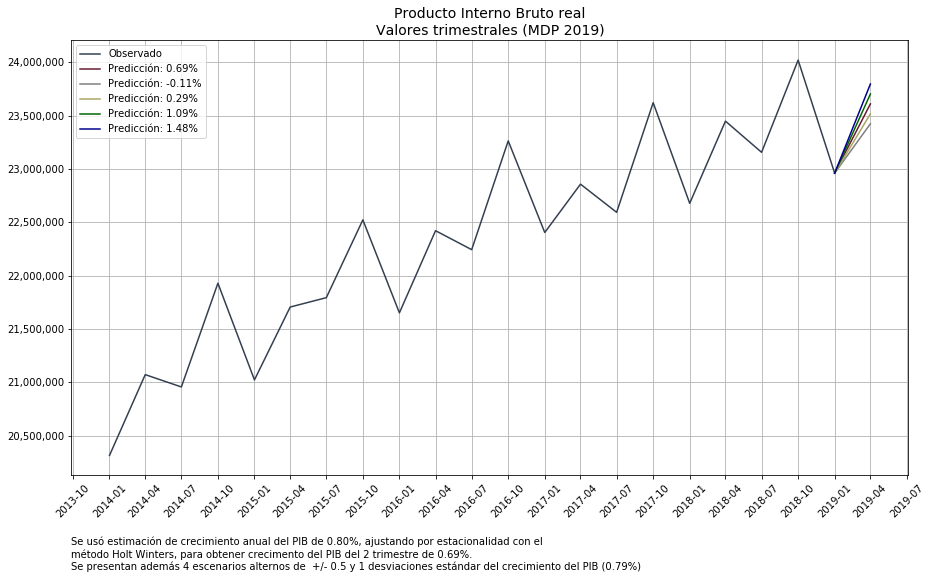

In [50]:
# Hacemos un DF específico para graficar también el PIB
pib_r_df_predict_q_to_plot = pib_r_df_predict_q.copy()
# Hacemos una lista con las variables que vamos a reemplazar por NaN antes del periodo de precicción
pib_predictions = [col for col in prediction_names_l if col != 'pibr_2019']
# Reemplazamos por NaN
pib_r_df_predict_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), pib_predictions] = np.nan

# Creamos lista de labels
pib_labels = ['Observado']
pib_labels += [col.replace('pib_r_2019_', 'Predicción: ') for col in prediction_names_l if\
              col.startswith('pib_r_2019_')]

descriptive.plot_series(df=pib_r_df_predict_q_to_plot,
                        cols=prediction_names_l,
                        legend=pib_labels,
                        title='Producto Interno Bruto real', subtitle='Valores trimestrales (MDP 2019)',
                        ticks='quarterly', 
                        save_to='../figures/pib_real.png',
                        footnote=footnote)

In [51]:
# Copiamos los ingresos a una nueva DF
ingresos_totales_to_trim = ingresos_totales.copy()
# Creamos ingresos tributarios trimestrales como la suma de los meses que componen cada trimestre
ingresos_totales_q = ingresos_totales_to_trim.resample('QS').sum()
ingresos_totales_q.replace({0: np.nan}, inplace=True)

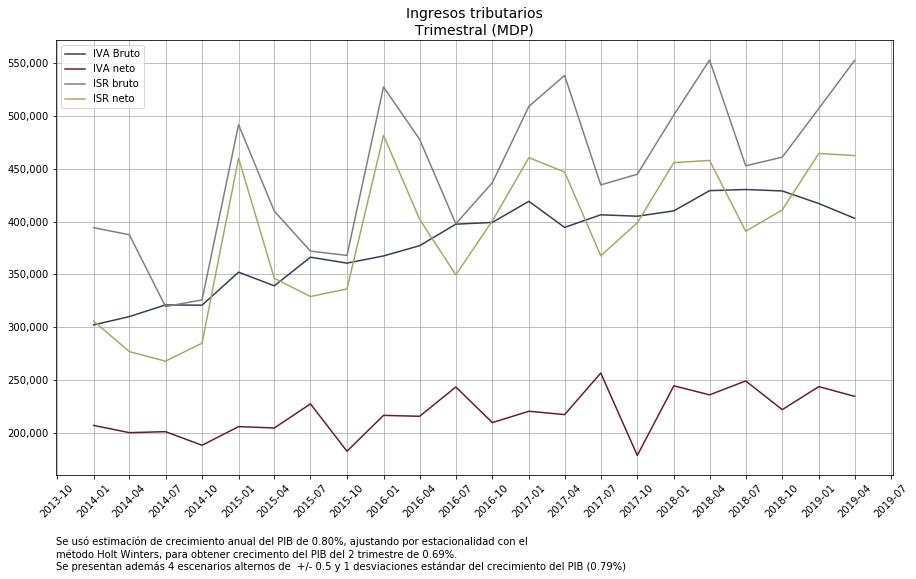

In [52]:
descriptive.plot_series(df=ingresos_totales_q['2014-01-01':],
                        cols=['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r','isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r'],
                        legend= ['IVA Bruto', 'IVA neto','ISR bruto', 'ISR neto'],
                        title='Ingresos tributarios', subtitle='Trimestral (MDP)',ticks='quarterly',
                        footnote=footnote)

## Volvemos a calcular valores porcentuales

In [53]:
# Para calcular la eficiencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df_q = pd.DataFrame(index=ingresos_totales_q.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'isr_iva_bruto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
prediction_names_l.append('pibr_2019')
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_totales_q[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict_q[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df_q[nombre_variable_ef] = (impuesto / prediction_pib) * 100

# Gráfica 1

In [54]:
# De nuevo hacemos un DF específico para el plot
eficiencia_df_q_to_plot = eficiencia_df_q.copy()
# Reemplazamos por NA las variables en prediction_vars para el periodo observado
# eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

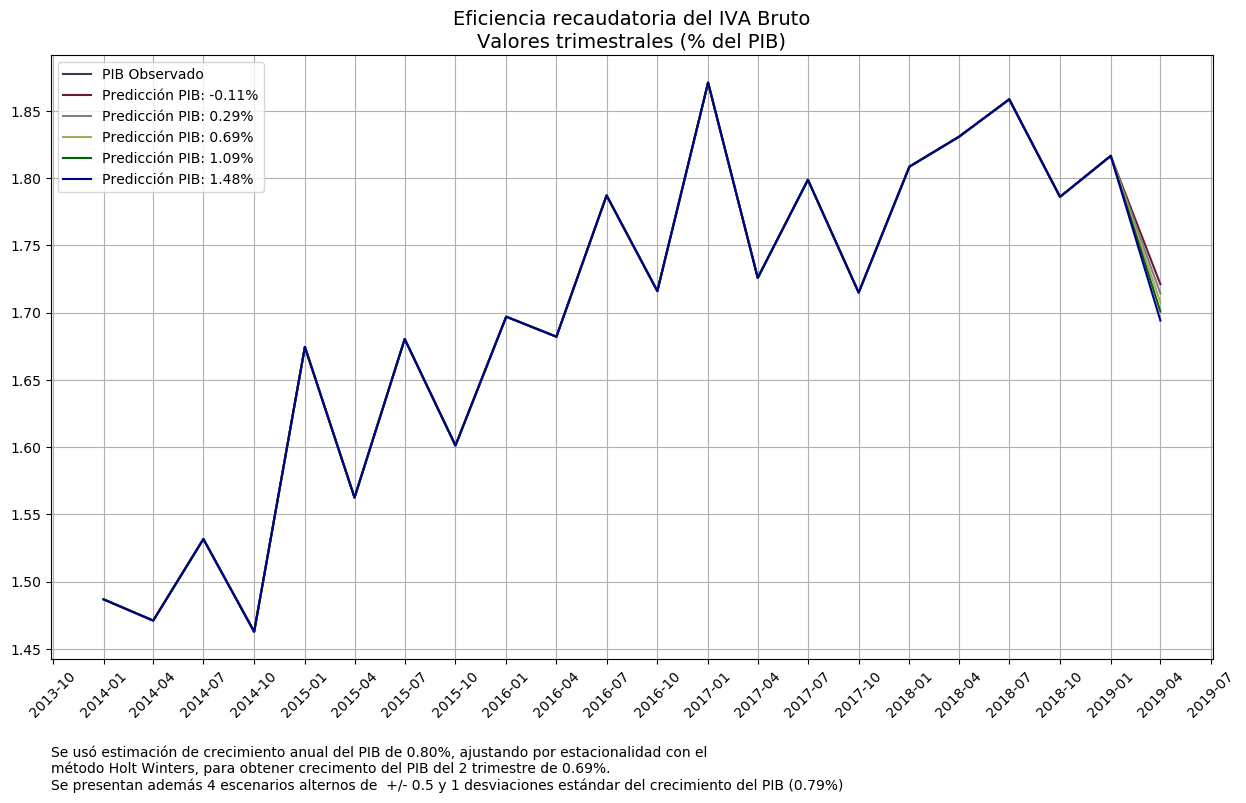

In [55]:
# Hacemos graficas para IVA
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
                        dpi=100, footnote=footnote)

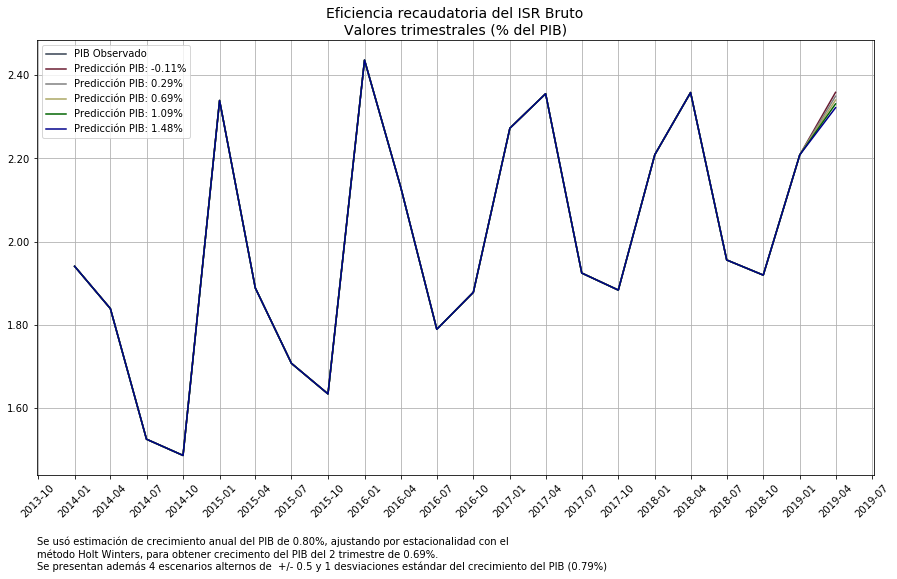

In [56]:
# HAcemos graficas para ISR
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
#                         save_to='../figures/eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [57]:
# # Calculamos diferencias en eficiencia
cambio_eficiencia_df_q = eficiencia_df_q.diff(4)

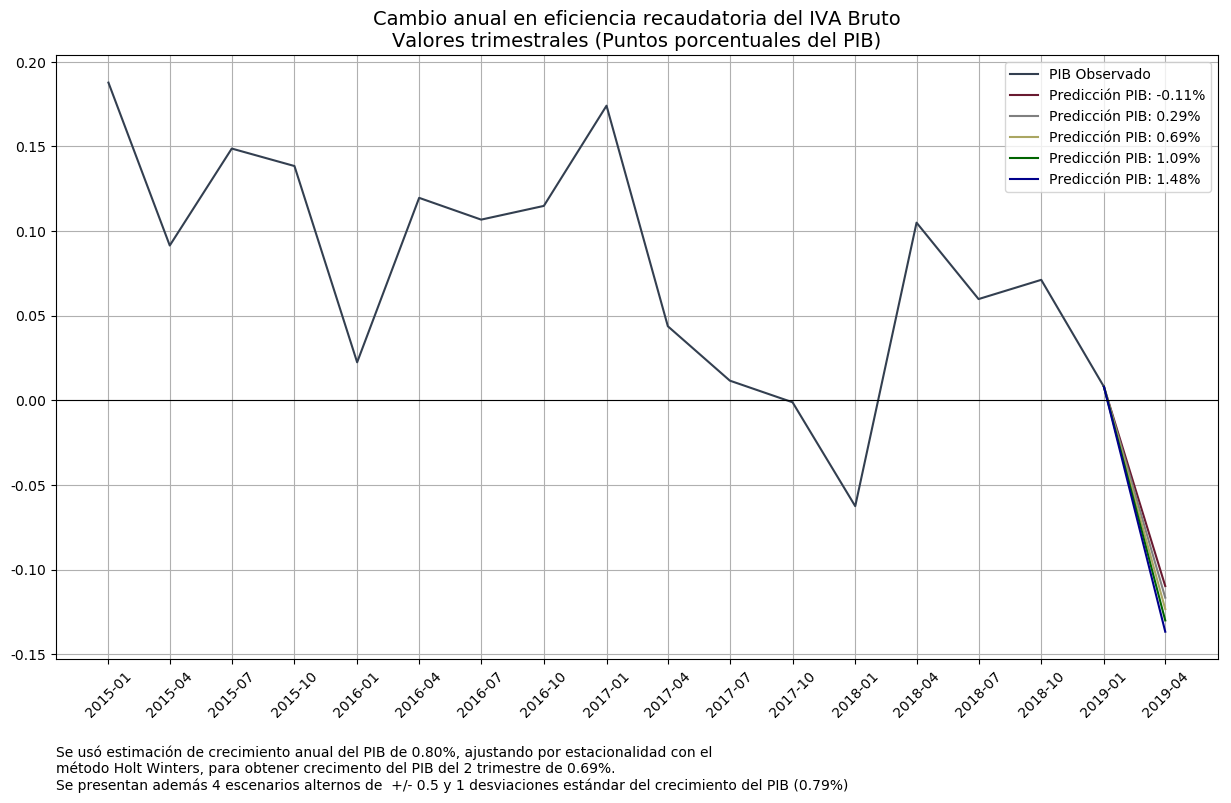

In [58]:
# HAcemos graficas para IVA
cambio_eficiencia_df_q_to_plot = cambio_eficiencia_df_q.copy()
cambio_eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        dpi=100,
                        footnote=footnote)

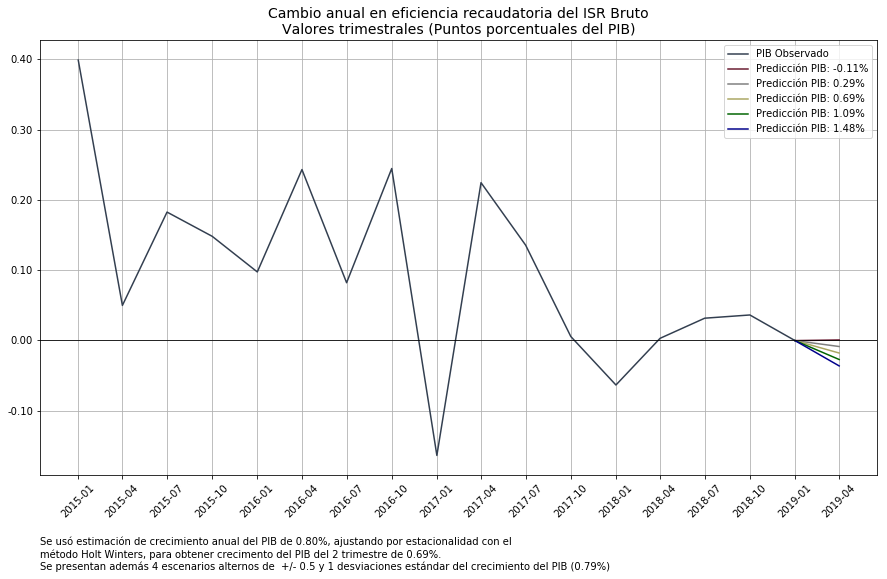

In [59]:
# Hacemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
#                         save_to='../figures/cambio_eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote)

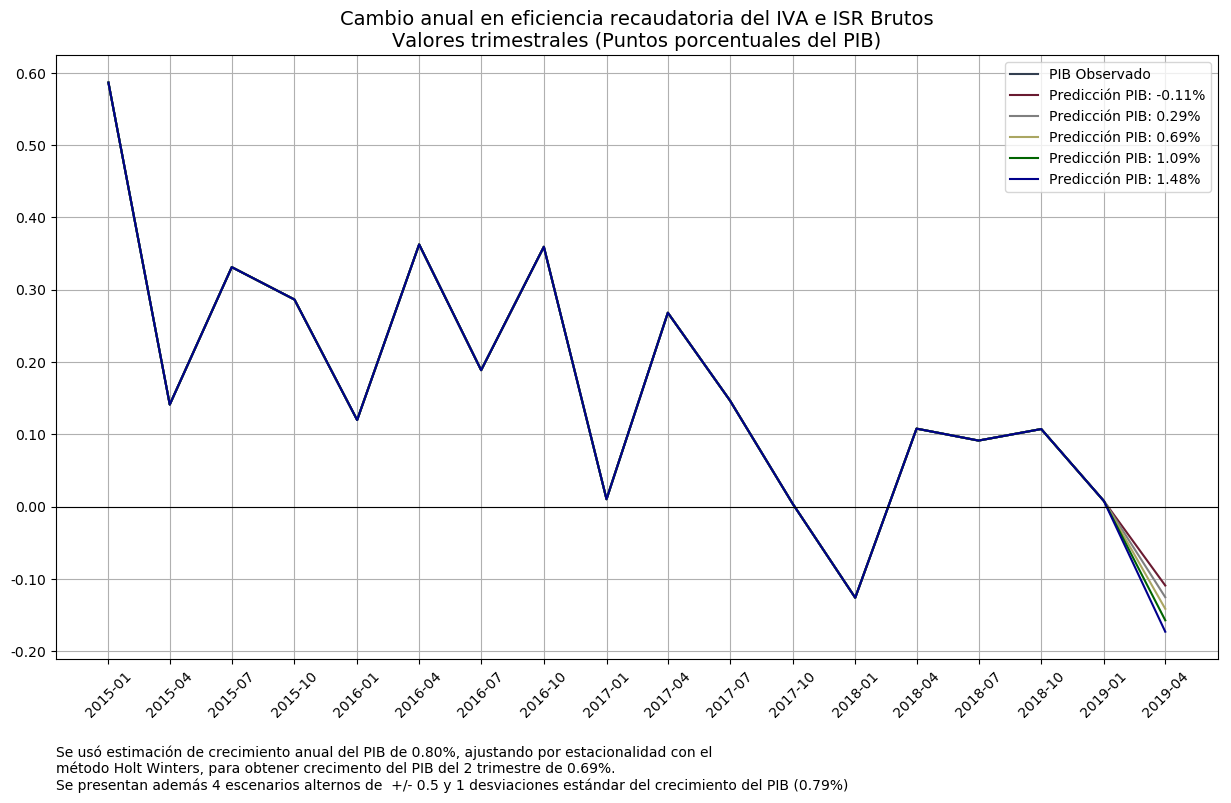

In [60]:
# HAcemos graficas para IVA
cambio_eficiencia_df_q_to_plot = cambio_eficiencia_df_q.copy()
cambio_eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['isr_iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA e ISR Brutos',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        dpi=100,
                        footnote=footnote)